#Trabajo Final del Master

Los archivos están siendo almacenados en un repositorio Github de equipo https://github.com/bastiatus/off.serranoalchemy/tree/main

##Limpieza

Diccionario https://world.openfoodfacts.org/data/data-fields.txt

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/bastiatus/off.serranoalchemy/main/off.onlyserrano.json"
df = pd.read_json(url, dtype={'code': str})
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


Expandimos "nutriments"

In [ ]:
df_expanded_nutriments = pd.json_normalize(df['nutriments'])
df_expanded_nutrient_levels = pd.json_normalize(df['nutrient_levels'])

df_expanded_nutrient_levels = df_expanded_nutrient_levels.add_prefix('nutrient_levels_')

df = pd.concat([df.drop(['nutriments', 'nutrient_levels'], axis=1), df_expanded_nutriments, df_expanded_nutrient_levels], axis=1)
#df = pd.concat([df.drop(['nutriments'], axis=1), df_expanded_nutriments], axis=1)


Listado de columnas de "nutriments"

In [ ]:
column_names = df_expanded_nutriments.columns.tolist()
column_names.sort()

# Mostrar los nombres de columna ordenados
#column_names

###Columnas de interes

Agregamos las columnas que necesitamos ("Ver Diccionario").

In [ ]:
#ver diccionario
columnas_interes_0 = ['code',   #no incluir en cluster
                    'product_name', #no incluir en cluster
                    'brands',#no incluir en cluster
                    'quantity',#no incluir en cluster
                    'categories',#no incluir en cluster
                    'countries',#no incluir en cluster
                    'ingredients_text', #no incluir en cluster
                    'calcium_100g',
                    'carbohydrates_100g',
                    'cholesterol_100g',
                    'energy-kcal_100g',
                    'fat_100g', #diferencia entre fat y saturada =monosaturadas
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g',
                    'saturated-fat_100g',
                    'sugars_100g',
                    'trans-fat_100g' # corr fat
                    ]

df_col = df[columnas_interes_0]
df_col.head(1)
#len(df_col)

code  \
0  0017869707759   

                                                                product_name  \
0  Jamon serrano dry cured ham coated with paprika slices separated by paper   

                                            brands quantity  \
0  Campofrio Food Group - America  Inc., Campofrio      NaN   

                                                                                                                   categories  \
0  Meats, Prepared meats, Meat-based-products, Hams, Cured ham, Dried hams, Spanish meat products, Serrano ham, Raw-cured-ham   

       countries      ingredients_text  calcium_100g  carbohydrates_100g  \
0  United States  Pork, salt, paprika.          0.00                0.00   

   cholesterol_100g  energy-kcal_100g  fat_100g  fiber_100g  proteins_100g  \
0              0.09            286.00     21.43        0.00          25.00   

   salt_100g  saturated-fat_100g  sugars_100g  trans-fat_100g  
0       5.71               12.50         0.00            0.00

In [ ]:
#Sirve para ver productos que no son jamon serrano
#product_name_to_code_col_2 = dict(zip(df_col_2['product_name'], df_col_2['code']))

#product_name_to_code_col_2

###Exclusión de productos - Regex

Limpieza de productos que no son jamon

In [ ]:
# eliminación de palabras que no son productos de jamon

import re

palabras_a_excluir = ["Twistos", "Pizza", "Tortilla", "Papas","Delicias", "Tacos", "Croquetas", "Lay's","Chips", "Crowuetas",
                      "Salchichon",'Tortitas','Muslo','Usnack','Caldo','Taco','Tapitas','Plata','pollo',
                      'Pollo','Pechugas','Paté','Croqietas','Croqueta','Cumbia','Pechuga','Patatas','Sandwich',
                      'MINITAQUITOS','Pasta', 'con relleno de','Torreznillos','Tapas','Queso','Lote','Crema de','Pimientos rellenos']
expresion_regular = '|'.join([re.escape(palabra) for palabra in palabras_a_excluir])

df_col_2 = df_col[~df_col['product_name'].str.contains(expresion_regular, case=False, na=False, regex=True)]
len(df_col_2)

2439

###Selección de España

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_col_2['countries'].value_counts()

en:es                               1210
España                               706
Spain                                 81
France                                77
en:fr                                 58
en:ch                                 33
en:france                             28
en:spain                              19
en:it                                 19
en:de                                 14
en:be                                 14
en:Spain                              13
en:gb                                 11
United States                         10
en:ad                                  9
en:us                                  7
Germany                                6
Deutschland                            6
en:FR                                  6
en:Germany                             5
en:Ireland                             5
Francia, Spain                         5
es                                     5
Francia,España                         4
Francia         

In [ ]:

# Solo españa

er = r"(España|Spain|en:es|en:spain)"
df_off_spain = df_col_2[df_col_2["countries"].str.contains(er, case=False, na=False, regex = True)]

len_spain = len(df_off_spain)
len_total = len(df_col_2)
proporcion = len_spain / len_total

print("Número total de filas en el DataFrame:", len_total)
print("Número de filas relacionadas con España:", len_spain)
print("Proporción de filas relacionadas con España:", proporcion)

Número total de filas en el DataFrame: 2439
Número de filas relacionadas con España: 2051
Proporción de filas relacionadas con España: 0.8409184091840919


<ipython-input-148-d25f5cd56db4>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_off_spain = df_col_2[df_col_2["countries"].str.contains(er, case=False, na=False, regex = True)]


###Revisión NA's

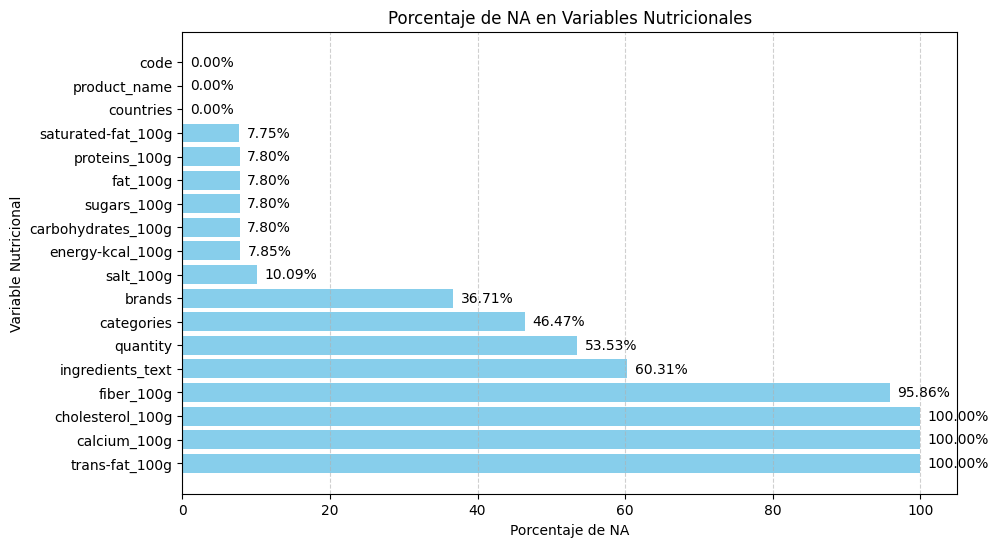

In [ ]:
import matplotlib.pyplot as plt

na_percentages = (df_off_spain.isna().mean() * 100).round(2)
variables_con_menos_na = na_percentages[na_percentages < 101]
variables_con_menos_na = variables_con_menos_na.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
ax = plt.gca()


bars = plt.barh(variables_con_menos_na.index, variables_con_menos_na.values, color='skyblue', edgecolor='none')

plt.xlabel('Porcentaje de NA')
plt.ylabel('Variable Nutricional')
plt.title('Porcentaje de NA en Variables Nutricionales')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)

#Información de porcentajes
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')

plt.show()

In [ ]:
variables_con_menos_na

code                   0.00
product_name           0.00
countries              0.00
saturated-fat_100g     7.75
proteins_100g          7.80
fat_100g               7.80
sugars_100g            7.80
carbohydrates_100g     7.80
energy-kcal_100g       7.85
salt_100g             10.09
brands                36.71
categories            46.47
quantity              53.53
ingredients_text      60.31
fiber_100g            95.86
cholesterol_100g     100.00
calcium_100g         100.00
trans-fat_100g       100.00
dtype: float64

In [ ]:
columnas_de_interes_1 = ['code','countries','product_name','brands','ingredients_text','carbohydrates_100g', 'energy-kcal_100g', 'fat_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g']


df_off_spain_2 = df_off_spain[columnas_de_interes_1].copy()
df_off_spain_2.shape[1]
df_off_spain_2.head(1)

code       countries                 product_name     brands  \
11  20415136  Francia, Spain  Jamon serrano reserva duroc  Realvalle   

   ingredients_text  carbohydrates_100g  energy-kcal_100g  fat_100g  \
11              NaN                0.90            253.00     14.20   

    proteins_100g  salt_100g  saturated-fat_100g  sugars_100g  
11          30.30       4.50                5.90         0.50

Revisión de NA's en las variables de nutrientes

In [ ]:
import numpy as np

columnas_de_interes_2 = ['carbohydrates_100g', 'energy-kcal_100g', 'fat_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g']

df_off_spain_2['is_na'] = df_off_spain_2[columnas_de_interes_2].isna().sum(axis=1)

conteo_por_grupo = df_off_spain_2.groupby('is_na').size()
conteo_por_grupo

is_na
0    1813
1      78
5       3
6      25
7     132
dtype: int64

Se selecciona la variable "is_na" cuando es cero (sin valores faltantes) y cuando es 1 (para trata este nulo con el algoritmo MICE en los siguientes pasos)

###Limpieza de duplicados

In [ ]:
columnas_a_verificar = ['product_name','brands',
                        'carbohydrates_100g', 'energy-kcal_100g', 'fat_100g',
                        'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g',
                        ]

duplicados = df_off_spain_2[df_off_spain_2.duplicated(subset=columnas_a_verificar, keep=False)]

if duplicados.empty:
    print("No se encontraron duplicados en las columnas especificadas.")
else:
    print("Se encontraron duplicados en las columnas especificadas:")
    print(duplicados.count())


Se encontraron duplicados en las columnas especificadas:
code                  664
countries             664
product_name          664
brands                582
ingredients_text      365
carbohydrates_100g    609
energy-kcal_100g      609
fat_100g              609
proteins_100g         609
salt_100g             605
saturated-fat_100g    609
sugars_100g           609
is_na                 664
dtype: int64


In [ ]:
columnas_a_verificar = ['product_name', 'brands', 'carbohydrates_100g', 'energy-kcal_100g', 'fat_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g']
df_sin_duplicados = df_off_spain_2.drop_duplicates(subset=columnas_a_verificar, keep='first')

total_filas = len(df_sin_duplicados)
print("El total de filas en el DataFrame es:", total_filas)

El total de filas en el DataFrame es: 1503


buscador de duplicados 1 a 1

In [ ]:
#palabra_buscada = 'Jamón serrano medias lonchas'#'Finisimo jamon de cebo iberico (50% raza iberica)'
#marca_buscada = 'Bonarea'

#resultados = df_sin_duplicados[df_sin_duplicados['product_name'].str.contains(palabra_buscada, regex=False) & (df_sin_duplicados['brands'] == marca_buscada)]
#resultados

buscador de duplicados con uno y dos nutrientes diferentes sin code, solo por nombre y brands, para revisión

In [ ]:
# Selecciona las columnas relevantes para la comparación
columnas_nutrientes = ['carbohydrates_100g', 'energy-kcal_100g', 'fat_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g']

# Encuentra las diferencias en nutrientes entre las filas con códigos diferentes
df_duplicados = df_off_spain_2[df_off_spain_2.duplicated(subset=['product_name', 'brands'], keep=False)]
diferencias_nutrientes = df_duplicados.groupby(['product_name', 'brands'])[columnas_nutrientes].nunique()

# Filtra las filas donde la mayoría de nutrientes son similares, pero un par de ellos son distintos
filas_con_diferencias = diferencias_nutrientes[(diferencias_nutrientes == 1).sum(axis=1) >= len(columnas_nutrientes) - 2]


filas_con_diferencias

carbohydrates_100g  \
product_name                                      brands                           
FINISIMO JAMON IBERICO COCIDO                     Bonarea                      1   
Finisimo Jamon Iberico Cocido                     Bonarea                      1   
Finisimo de jamon serrano                         Bonarea                      2   
Finisimo jamon de cebo iberico (50% raza iberica) Bonarea                      2   
Finisimo jamón de cebo ibérico                    Bonarea                      1   
Finisimo jamón iberico cocido                     Bonarea                      1   
Finissimo de jamon serrano                        Bonarea                      1   
Finísimo de jamón serrano                         Bonárea                      1   
                                                  bonarea                      2   
Finísimo jamon de cebo ibérico                    Bonarea                      1   
Finísimo jamón de cebo iberico                    Bonarea                      1   
Finísimo jamón de cebo ibérico                    Bonarea                      2   
Finísimo jamón iberico cocido                     Bonarea                      1   
Jamon Serrano                                     Bonarea                      2   
                                                  Incarlopsa                   1   
Jamon Serrano Familiar                            Bonarea                      1   
Jamon Serrano Reserva Loncha                      Carrefour                    1   
Jamon Serrano Reserva Medias Lonchas              Carrefour                    1   
Jamon de cebo iberico                                                          1   
Jamon de cebo ibérico                             Bonarea                      1   
Jamon iberico cocido                              Bonarea                      1   
Jamon serrano familiar                            Bonarea                      2   
Jamon serrano gran reserva                        Bonarea                      1   
Jamon serrano reserva                             Realvalle                    1   
Jamón Serrano                                     Bonarea                      2   
Jamón Serrano Gran Reserva                        Bonarea                      1   
Jamón de cebo ibérico                             Bonarea                      2   
                                                  Carrefour                    1   
                                                  iglesias                     1   
Jamón serrano                                     BonÁrea                      1   
                                                  Supersol                     1   
                                                  bonarea                      2   
                                                  campofrio                    1   
Jamón serrano familiar                            BonÀrea                      1   
                                                  BonÁrea                      1   
Jamón serrano medias lonchas                      Hiper Dino                   1   
                                                  bonarea                      1   
Jamón serrano reserva                             Alteza                       1   
                                                  Espuña                       1   
                                                  Hacendado                    1   
                                                  Mercadona                    1   
VIRUTAS DE JAMON SERRANO                          Bonarea                      1   
Virutas de jamon serrano                          Bonarea                      2   
Virutas jamon de cebo iberico                     Bonarea                      1   
Virutas jamón cebo ibérico                        Bonarea                      1   

                                                              energy-kcal_100g  \
product_name                   

In [ ]:
codigos_a_eliminar = [
    "00586431500121001917", "00748236400122001994", "00748206800122001434", "00681626504920001985", "00681609703220002040",
    "00584723200120004110", "00584702700121003404", "00584713900221004127", "00586429500119001399", "00586425700119001465",
    "00586419800119001324", "00586432000119001374", "00586431100119001587", "00586432000119001374", "00586435300119001624",
    "00586400900120001398", "00586404800120001540", "00586406500220001621", "00586407200120001606", "00586407400120001525",
    "00586419600220001486", "00586425400120001590", "00586406900122001963", "00586424300122002001", "00584710400121003020",
    "00584700700120003735", "00584723400219003622", "00584723400120003612", "00544722500121006775", "00569023800221002929",
    "00569035800121002963", "00597435605421001710", "00544736400121007402", "00428401200122003331", "00428409100222003434",
    "00586420300122001947", "00544732100122007886", "00597201600120003718", "00703609000122003786", "00544718100121006545",
    "00584734500119003565", "00597219000122003737", "00597224200119003692", "00597301303220003952", "00597404200322001892",
    "00597432203421001889", "00703728800119001436", "00703727400119001415", "00703707700120001388", "00703725800122001693",
    "00703707000121001364", "00703713900120001420"
]
df_sin_duplicados = df_sin_duplicados[~df_sin_duplicados['code'].isin(codigos_a_eliminar)]

df_sin_duplicados.count()

code                  1452
countries             1452
product_name          1452
brands                 753
ingredients_text       491
carbohydrates_100g    1330
energy-kcal_100g      1329
fat_100g              1330
proteins_100g         1330
salt_100g             1292
saturated-fat_100g    1331
sugars_100g           1330
is_na                 1452
dtype: int64

In [ ]:
df_off_spain_2 = df_sin_duplicados.copy()

df_off_spain_2.head()

code       countries  \
11       20415136  Francia, Spain   
12       20526641  Francia, Spain   
36  8410320031462           Spain   
38  8410320242004    France,Spain   
39  8410468001372  Francia,España   

                                           product_name     brands  \
11                          Jamon serrano reserva duroc  Realvalle   
12                               Jamón de cerdo ibérico  Realvalle   
36  Jamón serrano medias lonchas sin gluten sin lactosa    Navidul   
38                                Jamon de cebo iberico              
39                        Jamón de bellota 100% ibérico              

                                     ingredients_text  carbohydrates_100g  \
11                                                NaN                0.90   
12                                                NaN                0.00   
36  Jamón de cerdo, sal, conservadores (E-250, E-252)                0.50   
38                                                                   1.00   
39                                                                   0.00   

    energy-kcal_100g  fat_100g  proteins_100g  salt_100g  saturated-fat_100g  \
11            253.00     14.20          30.30       4.50                5.90   
12            327.00     23.00          30.00       4.80                8.70   
36            212.00     10.00          30.00       5.00                3.80   
38            338.00     24.00          30.00       5.00                9.00   
39            321.00     21.00          33.00       4.10                7.50   

    sugars_100g  is_na  
11         0.50      0  
12         0.00      0  
36         0.50      0  
38         1.00      0  
39         0.00      0

###Creación grasas insatuadas (grasas buenas)

In [ ]:
df_off_spain_3 = df_off_spain_2[df_off_spain_2['is_na'].isin([0, 1])].copy()
df_off_spain_3['insaturated-fat_100g'] = df_off_spain_3['fat_100g']-df_off_spain_3['saturated-fat_100g']
df_off_spain_3.drop(columns=['fat_100g'], inplace=True)
df_off_spain_3.head(2)

code       countries                 product_name     brands  \
11  20415136  Francia, Spain  Jamon serrano reserva duroc  Realvalle   
12  20526641  Francia, Spain       Jamón de cerdo ibérico  Realvalle   

   ingredients_text  carbohydrates_100g  energy-kcal_100g  proteins_100g  \
11              NaN                0.90            253.00          30.30   
12              NaN                0.00            327.00          30.00   

    salt_100g  saturated-fat_100g  sugars_100g  is_na  insaturated-fat_100g  
11       4.50                5.90         0.50      0                  8.30  
12       4.80                8.70         0.00      0                 14.30

### Matriz de correlación - heatmap

<ipython-input-160-8a794d181976>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_off_spain_3.corr()


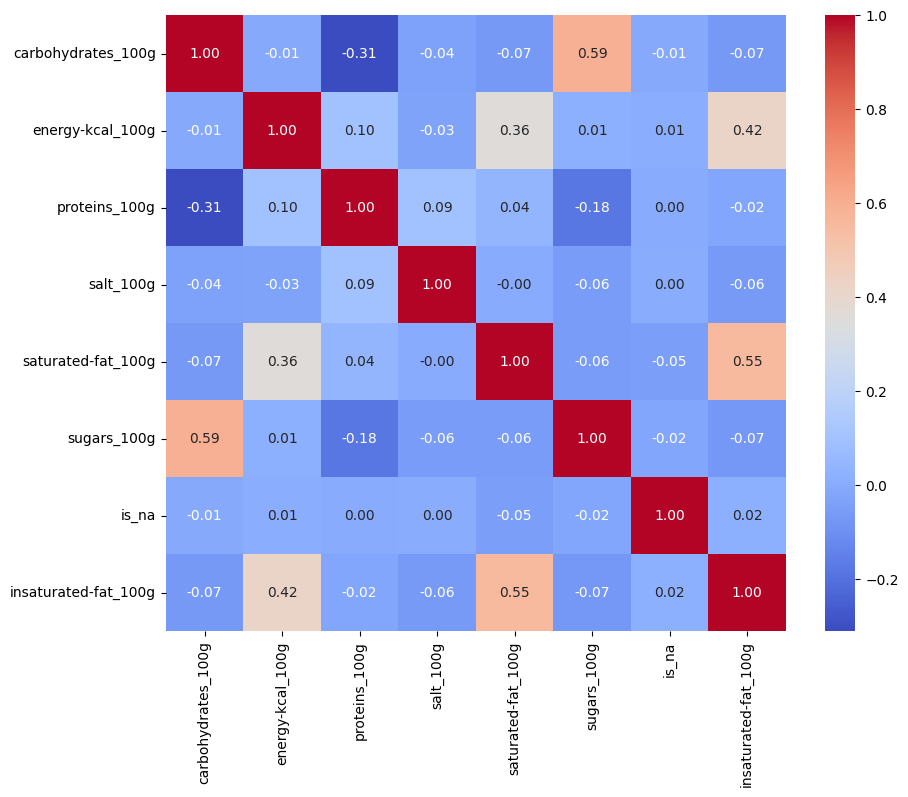

In [ ]:
import seaborn as sns

correlacion = df_off_spain_3.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
tipo_de_variable = df_off_spain_3.dtypes
tipo_de_variable

code                     object
countries                object
product_name             object
brands                   object
ingredients_text         object
carbohydrates_100g      float64
energy-kcal_100g        float64
proteins_100g           float64
salt_100g               float64
saturated-fat_100g      float64
sugars_100g             float64
is_na                     int64
insaturated-fat_100g    float64
dtype: object

https://cran.r-project.org/web/packages/mice/index.html

https://pypi.org/project/python-Levenshtein/

https://getir.com/es/


###Precios

####Busqueda manual por codigo

Se agrega el precio a 188 registros del dataframe de jamon serrano con 1901 registros, cruzando la información por la variable "code".



In [ ]:
df_off_spain_4 = df_off_spain_3.copy()

url_price = "https://raw.githubusercontent.com/bastiatus/off.serranoalchemy/main/jamon_serrano_prc.xlsx"
df_price = pd.read_excel(url_price)
df_price['code'] = df_price['code'].astype(str)

#df_off_spain_filtered = df_off_spain_4[df_off_spain_4['code'] == '8410320031462']

df_off_spain_price = df_off_spain_4.merge(df_price[['code', 'price_100g']], on='code', how='left')

df_off_spain_price
#result_df

#result_df_filtered = result_df[~result_df['price_100g'].isna()]
#result_df_filtered


code                         countries  \
0                     20415136                    Francia, Spain   
1                     20526641                    Francia, Spain   
2                8410320031462                             Spain   
3                8410320242004                      France,Spain   
4                8410468001372                    Francia,España   
5                8421384012014         Francia  España, en:spain   
6                8414807512499                            España   
7                8421384009724  France  Germany  Spain, en:spain   
8                8425545113411           Francia,España,en:spain   
9                8431876142921                            España   
10               8436030021005                            España   
11               8433329079266                    Francia, Spain   
12               8437007350944                    Francia, Spain   
13               8480000582287                          en:Spain   
14               8480017077165                      China,España   
15               8437005247864                            España   
16               8480000582294                          en:Spain   
17               8410320287449                    Francia,España   
18                    20188016                   España,en:spain   
19                    20077792           Francia,España,en:spain   
20               8480017075017                    Francia,España   
21                    24026680                            España   
22        00569008500119002642                            España   
23               8410320131797                      Ghana,España   
24               8431945708270                            España   
25               8425545117624                            España   
26                    20078669                            España   
27                    20077822                            España   
28               8436037457920                            España   
29               8436011771912                            España   
30               8437011582850                            España   
31                    20797256                          en:spain   
32               8410764010474                     Belgium,Spain   
33        00544714700219006071                            España   
34               8411769182005                             en:es   
35               8422410495917                             Spain   
36               8436025311029                            España   
37               2970782002500                            España   
38               8437004429063                            España   
39               8436011776184                          en:spain   
40               8419554540290                            España   
41        00544717800219006754                            España   
42               2987084002206                            España   
43               8436004313907                          en:spain   
44               8480017009319                             en:es   
45                    24080880                            España   
46               8412954020102                             Spain   
47               8410783339211                            España   
48               2988488002205                            España   
49                    24085823                             Spain   
50               8410764012706                    Francia,España   
51               8410764013796                            España   
52               2965656002793                            España   
53               8422598051073                            España   
54               8431876245257                            España   
55               8427546072742                            España   
56               8425545195899                            España   
57               2987611002402                            España   
58            

####Scrapping - OCR (Reconocimiento Óptico de Caracteres)

In [ ]:
# jamones con precio antes de OCR
df_off_spain_price["price_100g"].count()

169

In [ ]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install pytesseract
import pytesseract
from PIL import Image
import requests
from io import BytesIO

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


Prueba por imagen

Almacenamiento de url con producto para obtener url de imagen (se dejará comentado y guardado en archivo pickle)

In [ ]:
#import requests
#from bs4 import BeautifulSoup
#
#codigos_productos = df_off_spain_price['code']
#url_base = "https://world.openfoodfacts.org/product/"
#df_off_spain_price['url_producto'] = url_base + codigos_productos
#
#
#for index, row in df_off_spain_price.iterrows():
#    url_producto = row['url_producto']
#
#    respuesta = requests.get(url_producto)
#
#    if respuesta.status_code == 200:
#        contenido_html = respuesta.content
#        soup = BeautifulSoup(contenido_html, 'html.parser')
#        imagen_producto = soup.find('img', {'id': 'og_image', 'class': 'product_image'})
#
#
#        if imagen_producto:
#            url_imagen = imagen_producto['src']
#
#            df_off_spain_price.at[index, 'url_imagen'] = url_imagen
#            print(f"URL de la imagen para el código {row['code']}: {url_imagen}")
#        else:
#            print(f"No se encontró la imagen para el código {row['code']}.")
#    else:
#        print(f"No se pudo obtener el contenido de la página para el código {row['code']}.")

In [ ]:
url = 'https://images.openfoodfacts.org/images/products/005/864/065/00220001621/front_es.3.full.jpg'
patron_precio = r'(\d+[,.]\d+|\d+[,.]\d+)\s*€'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
texto_extraido = pytesseract.image_to_string(img)
resultado_precio_kg = re.search(patron_precio, texto_extraido)
print(texto_extraido)
if resultado_precio_kg:
     precio_texto = resultado_precio_kg.group(1).replace(' ', '')
     precio_por_kg = float(precio_texto.replace(',', '.'))
     print(f"El precio por kilogramo es: {precio_por_kg} euros")
     print(f"La cantidad por 100 gramos es: {precio_por_kg/10} euros")
else:
     print("No se encontró el precio por kilogramo.")

FINISIMO DE JAMON SERRANO
FINISSIM DE PERNIL SERRANO

5 02976 preferentement¢ —=——
antes del SS
04.05.20 ===
=S=
ie a canene 068 orale tes PRECIO/Kg  PESONETO: —=
i ‘
ee 13,60€ 0119kg ==
2B gic —————
IMPORTE
ENVASE RECERRABLE
rporacion Alimentaria Gui oe
spalau, 8 : Vand
10Gutssona(Lleida) 8) 5864065001625

900 899 988-bonarea.com ~E ~

 

 

El precio por kilogramo es: 13.6 euros
La cantidad por 100 gramos es: 1.3599999999999999 euros


(se dejará comentado y guardado en archivo pickle)

In [ ]:
#df_off_spain_price['url_imagen'] = df_off_spain_price['url_imagen'].str.replace('400.jpg', 'full.jpg')
#df_off_spain_price.head()

In [ ]:
#count_no_na = df_off_spain_price['price_100g'].count()
#print(f"Valores no nulos en la columna 'price': {count_no_na}")

Obtiene precio por lectura de imagenes (se dejará comentado y guardado en archivo pickle)

In [ ]:
#import requests
#from PIL import Image
#from io import BytesIO
#import pytesseract
#import re
#
#patron_precio = r'(\d+[,.]\d+|\d+[,.]\d+)\s*€'
#
#for index, row in df_off_spain_price.iterrows():
#    url_imagen = row['url_imagen']
#
#    try:
#        response = requests.get(url_imagen)
#
#        if response.status_code == 200:
#            img = Image.open(BytesIO(response.content))
#
#            texto_extraido = pytesseract.image_to_string(img)
#            resultado_precio_kg = re.search(patron_precio, texto_extraido)
#
#            if resultado_precio_kg:
#                precio_texto = resultado_precio_kg.group(1).replace(' ', '')
#                precio_por_kg = float(precio_texto.replace(',', '.'))
#                precio_por_100g = precio_por_kg / 10
#
#                df_off_spain_price.at[index, 'price_100g'] = precio_por_100g
#                print(f"Para el código {row['code']}:")
#                print(f"El precio por kilogramo es: {precio_por_kg} euros")
#                print(f"El precio por 100 gramos es: {precio_por_100g} euros")
#            else:
#                print(f"No se encontró el precio por kilogramo para el código {row['code']}.")
#        else:
#            print(f"No se pudo obtener la imagen para el código {row['code']}.")
#    except Exception as e:
#        print(f"Ocurrió un error para el código {row['code']}: {e}")
#        continue

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#
#import pickle
#
#ruta_drive = '/content/drive/My Drive/Colab Notebooks/'
#
##with open(ruta_drive + 'df_off_spain_price.pkl', 'wb') as file:
##    pickle.dump(df_off_spain_price, file)
#
#with open(ruta_drive + 'df_off_spain_price.pkl', 'rb') as file:
#    df_off_spain_price = pickle.load(file)

In [ ]:
import pickle
import requests

url = "https://raw.githubusercontent.com/bastiatus/off.serranoalchemy/main/df_off_spain_price.pkl"

response = requests.get(url)

if response.status_code == 200:

    with open('archivo.pkl', 'wb') as f:
        f.write(response.content)


    with open('archivo.pkl', 'rb') as f:
        data = pickle.load(f)

    #print("Archivo pickle cargado correctamente.")
    #print("Tipo de datos cargados:", type(data))
    if isinstance(data, pd.DataFrame):
        data.head()

else:
    print("Error al obtener el archivo desde la URL.")


data.head()

code       countries  \
0       20415136  Francia, Spain   
1       20526641  Francia, Spain   
2  8410320031462           Spain   
3  8410320242004    France,Spain   
4  8410468001372  Francia,España   

                                          product_name     brands  \
0                          Jamon serrano reserva duroc  Realvalle   
1                               Jamón de cerdo ibérico  Realvalle   
2  Jamón serrano medias lonchas sin gluten sin lactosa    Navidul   
3                                Jamon de cebo iberico              
4                        Jamón de bellota 100% ibérico              

                                    ingredients_text  carbohydrates_100g  \
0                                                NaN                0.90   
1                                                NaN                0.00   
2  Jamón de cerdo, sal, conservadores (E-250, E-252)                0.50   
3                                                                   1.00   
4                                                                   0.00   

   energy-kcal_100g  fat_100g  proteins_100g  salt_100g  saturated-fat_100g  \
0            253.00     14.20          30.30       4.50                5.90   
1            327.00     23.00          30.00       4.80                8.70   
2            212.00     10.00          30.00       5.00                3.80   
3            338.00     24.00          30.00       5.00                9.00   
4            321.00     21.00          33.00       4.10                7.50   

   sugars_100g  is_na  mono-unsaturated_100g  price_100g  \
0         0.50      0                   8.30         NaN   
1         0.00      0                  14.30         NaN   
2         0.50      0                   6.20        2.89   
3         1.00      0                  15.00        4.42   
4         0.00      0                  13.50       37.38   

                                            url_producto  \
0       https://world.openfoodfacts.org/product/20415136   
1       https://world.openfoodfacts.org/product/20526641   
2  https://world.openfoodfacts.org/product/8410320031462   
3  https://world.openfoodfacts.org/product/8410320242004   
4  https://world.openfoodfacts.org/product/8410468001372   

                                                                               url_imagen  
0          https://images.openfoodfacts.org/images/products/20415136/front_fr.39.full.jpg  
1           https://images.openfoodfacts.org/images/products/20526641/front_fr.4.full.jpg  
2  https://images.openfoodfacts.org/images/products/841/032/003/1462/front_es.37.full.jpg  
3   https://images.openfoodfacts.org/images/products/841/032/024/2004/front_fr.8.full.jpg  
4  https://images.openfoodfacts.org/images/products/841/046/800/1372/front_fr.14.full.jpg

In [ ]:
#df_off_spain['price_100g'] = df_off_spain_price['price_100g'].combine_first(data.set_index('code')['price_100g'])

merged_df = pd.merge(df_off_spain_price, data, on='code', suffixes=('_old', '_new'), how='outer')

def update_price(row):
    if pd.notnull(row['price_100g_old']):
        return row['price_100g_old']
    else:
        return row['price_100g_new']


merged_df['price_100g_old'] = merged_df.apply(update_price, axis=1)
merged_df = merged_df.drop(columns=merged_df.filter(like='_new').columns)
merged_df.columns = merged_df.columns.str.replace('_old', '')
merged_df.drop(columns='mono-unsaturated_100g', inplace=True)
merged_df.drop(columns='fat_100g', inplace=True)
merged_df.head()



code       countries  \
0       20415136  Francia, Spain   
1       20526641  Francia, Spain   
2  8410320031462           Spain   
3  8410320242004    France,Spain   
4  8410468001372  Francia,España   

                                          product_name     brands  \
0                          Jamon serrano reserva duroc  Realvalle   
1                               Jamón de cerdo ibérico  Realvalle   
2  Jamón serrano medias lonchas sin gluten sin lactosa    Navidul   
3                                Jamon de cebo iberico              
4                        Jamón de bellota 100% ibérico              

                                    ingredients_text  carbohydrates_100g  \
0                                                NaN                0.90   
1                                                NaN                0.00   
2  Jamón de cerdo, sal, conservadores (E-250, E-252)                0.50   
3                                                                   1.00   
4                                                                   0.00   

   energy-kcal_100g  proteins_100g  salt_100g  saturated-fat_100g  \
0            253.00          30.30       4.50                5.90   
1            327.00          30.00       4.80                8.70   
2            212.00          30.00       5.00                3.80   
3            338.00          30.00       5.00                9.00   
4            321.00          33.00       4.10                7.50   

   sugars_100g  is_na  insaturated-fat_100g  price_100g  \
0         0.50      0                  8.30         NaN   
1         0.00      0                 14.30         NaN   
2         0.50      0                  6.20        2.89   
3         1.00      0                 15.00        4.42   
4         0.00      0                 13.50       37.38   

                                            url_producto  \
0       https://world.openfoodfacts.org/product/20415136   
1       https://world.openfoodfacts.org/product/20526641   
2  https://world.openfoodfacts.org/product/8410320031462   
3  https://world.openfoodfacts.org/product/8410320242004   
4  https://world.openfoodfacts.org/product/8410468001372   

                                                                               url_imagen  
0          https://images.openfoodfacts.org/images/products/20415136/front_fr.39.full.jpg  
1           https://images.openfoodfacts.org/images/products/20526641/front_fr.4.full.jpg  
2  https://images.openfoodfacts.org/images/products/841/032/003/1462/front_es.37.full.jpg  
3   https://images.openfoodfacts.org/images/products/841/032/024/2004/front_fr.8.full.jpg  
4  https://images.openfoodfacts.org/images/products/841/046/800/1372/front_fr.14.full.jpg

In [ ]:
#df_off_spain_price = data.copy()
df_off_spain_price = merged_df.copy()

In [ ]:
count_no_na = df_off_spain_price['price_100g'].count()
print(f"Valores no nulos en la columna 'price': {count_no_na}")

Valores no nulos en la columna 'price': 271


corregir estos casos que son menos de 1 euro, con la imagen

In [ ]:
df_off_spain_price[df_off_spain_price['price_100g']<1]

code countries                    product_name  \
41    00544717800219006754    España          Jamón serrano familiar   
167          2968309006995    España           Jamón de Cebo Iberico   
180   00584726300119003968    España  Finisimo jamon de cebo iberico   
222   00681629101219002110     en:es            Jamón ibérico cocido   
254   00584727300119003516     en:es           Jamon de cebo iberico   
289   00586431200119001423    España       Finísimo de jamón serrano   
416          2988570009952     en:es          Jamón de cerdo ibérico   
448   00569033700119002468    España                   Jamón serrano   
534   00597411604120001656    España        Virutas de jamón serrano   
535          8435324003703    España           Jamón serrano reserva   
713   00569035600120002847    España                   Jamón serrano   
727   00681601806321001863     en:es   Finisimo jamon cocido iberico   
1100  00586415400122001904     en:es          Finísimo jamón serrano   
1133  00597219400122003537     en:es           JAMON DE CEBO IBÉRICO   
1155  00703720600122001915     en:es    Jamón Serrano Medias Lonchas   
1156  00782922300192000009  en:Spain         Jamón serrano fileteado   
1183  00597422301122001962     en:es        Virutas de Jamón serrano   
1206  00703627700122003903     en:es          Jamón Serrano Familiar   

                                brands  \
41                             BonÀrea   
167                            mafresa   
180                            Bonarea   
222                            Bonarea   
254                            Bonarea   
289                            Bonárea   
416                                NaN   
448                            Bonarea   
534                            Bonarea   
535   Comercial Logística de Calamocha   
713                            Bonarea   
727                            Bonarea   
1100                           Bonarea   
1133                           Bonarea   
1155                           Bonarea   
1156                           Arrullo   
1183                           Bonarea   
1206                               NaN   

                                                                                                       ingredients_text  \
41    Jamón de cerdo, sal, conservantes (nitrito de sodio y nitrato de potasio) y antioxidante (isoascorbato de sodio).   
167                                                                                                                       
180                                                                                                                       
222                                                                                                                 NaN   
254                                                                                                                 NaN   
289                                                                                                                       
416                                                                                                                 NaN   
448                                                                                                                       
534                                                                                                                       
535                                                                                                                       
713                                                                                                                       
727                                                                                                                 NaN   
1100                                                                                                                NaN   
1133                                                                                                                NaN   
1155     

Correción de casos que el scrapping no pudo obtener el precio/kg directo y sacó el importe:

In [ ]:
correcciones = {
    '00544717800219006754': 11.5/10,
    '00569025200219002425': 12.53/10,
    '2968309006995': 6.99,
    '00584726300119003968': 41.30/10,
    '00681629101219002110': 22.42/10,
    '00584727300119003516': 41.30/10,
    '00586431200119001423': 13.51/10,
    '2988570009952': 9.95,
    '00569033700119002468': 12.68/10,
    '00597411604120001656': 12.62/10,
    '8435324003703': 17.8/10,
    '8421384115845': 17.8/10,
    '00681601806321001863': 23.22/10,
    '00681604806621001775': 23.31/10,
    '00586408900121001672': 13.67/10,
    '00748216100122001678': 15.80/10,
    '00586415400122001904': 15.45/10,
    '00597219400122003537': 43.10/10,
    '00703720600122001915': 15.25/10,
    '00597422301122001962': 15.29/10,
    '00703627700122003903': 15.49/10,
    '00569035600120002847':12.78/10

}

# Aplicar correcciones al df
# df_off_spain_price['price_100g'] = df_off_spain_price['code'].map(correcciones)

for code, correction in correcciones.items():
    df_off_spain_price.loc[df_off_spain_price['code'] == code, 'price_100g'] = correction


codigo para corregir price anterior

In [ ]:
len(df_off_spain_price)

1330

In [ ]:
#codigo_buscar = '00586406500220001621'  # Código
#nuevo_valor_price =  34.25

#valor_100g = nuevo_valor_price / 10
#df_off_spain_price.loc[df_off_spain_price['code'] == codigo_buscar, 'price'] = valor_100g

In [ ]:
#caso malo a revisar 00681604806621001775 https://images.openfoodfacts.org/images/products/006/816/048/06621001775/front_es.3.full.jpg
#el código 00569033700119002468:
#El precio por kilogramo es: 2.46 euros
#El precio por 100 gramos es: 0.246 euros


#existe pero no lo agregó revisar patron 00569027100121002996  00586431000121001776   00598032200121001905

####Scraping - selenium

El url del notebook donde se realiza scrapping con la tecnica de selenium es https://github.com/bastiatus/off.serranoalchemy/blob/main/scraping.ipynb

In [ ]:
df_off_spain_price.to_pickle("df_off_spain_price.pkl")

In [ ]:
# jamones con precio antes de scraping:
df_off_spain_price['price_100g'].count()

272

In [ ]:
url = "https://raw.githubusercontent.com/bastiatus/off.serranoalchemy/main/df_scraping.pkl"

response = requests.get(url)

if response.status_code == 200:

    with open('archivo.pkl', 'wb') as f:
        f.write(response.content)

    # Leer el archivo pickle local
    with open('archivo.pkl', 'rb') as f:
        data2 = pickle.load(f)

    #print("Archivo pickle cargado correctamente.")
    #print("Tipo de datos cargados:", type(data))
    if isinstance(data2, pd.DataFrame):
        data2.head()

else:
    print("Error al obtener el archivo desde la URL.")


data2.head()

code countries              product_name     brands  \
0  230582780009406500006115    España     Jamón de cebo ibérico  mercadona   
1  230582780009606500006249    España     Jamón de cebo ibérico  mercadona   
2  230582800010012500012509     Spain  Jamón de bellota ibérico  mercadona   
3  230581470014401680002424     Spain             Jamón serrano  mercadona   
4  230582740008603250002809     Spain             Jamon serrano  mercadona   

  ingredients_text  carbohydrates_100g  energy-kcal_100g  fat_100g  \
0                                 1.00            397.00     29.50   
1                                 1.00            397.10     29.50   
2                                 1.00            393.00     30.00   
3                                 1.00            247.00     12.00   
4                                 1.00            299.00     18.70   

   proteins_100g  salt_100g  saturated-fat_100g  sugars_100g  is_na  \
0          31.91       3.50                9.70         0.50      0   
1          31.90       3.50                9.70         0.50      0   
2          29.50       3.50                9.00         0.60      0   
3          33.00       3.60                5.00         0.50      0   
4          31.80       3.60                6.80         0.50      0   

   mono-unsaturated_100g  price_100g  \
0                  19.80         NaN   
1                  19.80         NaN   
2                  21.00        5.35   
3                   7.00        0.64   
4                  11.90        3.29   

                                                       url_producto  \
0  https://world.openfoodfacts.org/product/230582780009406500006115   
1  https://world.openfoodfacts.org/product/230582780009606500006249   
2  https://world.openfoodfacts.org/product/230582800010012500012509   
3  https://world.openfoodfacts.org/product/230581470014401680002424   
4  https://world.openfoodfacts.org/product/230582740008603250002809   

                                                                                          url_imagen  \
0   https://images.openfoodfacts.org/images/products/230/582/780/009406500006115/front_es.5.full.jpg   
1  https://images.openfoodfacts.org/images/products/230/582/780/009606500006249/front_es.14.full.jpg   
2   https://images.openfoodfacts.org/images/products/230/582/800/010012500012509/front_es.3.full.jpg   
3   https://images.openfoodfacts.org/images/products/230/581/470/014401680002424/front_es.3.full.jpg   
4   https://images.openfoodfacts.org/images/products/230/582/740/008603250002809/front_es.3.full.jpg   

          norm_product_name  
0     jamon de cebo iberico  
1     jamon de cebo iberico  
2  jamon de bellota iberico  
3             jamon serrano  
4             jamon serrano

Marcas mas importantes en españa (más registros)

In [ ]:
#data2['price_100g'].count()

count_marca = data2["brands" ].value_counts()
count_marca.head(10)

bonarea      250
mercadona     54
              32
carrefour     22
juan luna     17
realvalle     14
boadas        10
auchan        10
espuna         9
navidul        9
Name: brands, dtype: int64

cruzarlo por code, si existe precio (campo price_100g) mantener precio df scraping 1 (df: df_off_spain_price), sino tomar valor precio df scrapping 2 (df: data). Después copiar todo en df_off_spain_price


In [ ]:
#print(df_off_spain_price.columns)
data2.drop(columns='mono-unsaturated_100g', inplace=True)
data2.drop(columns='fat_100g', inplace=True)
data2.head()

code countries              product_name     brands  \
0  230582780009406500006115    España     Jamón de cebo ibérico  mercadona   
1  230582780009606500006249    España     Jamón de cebo ibérico  mercadona   
2  230582800010012500012509     Spain  Jamón de bellota ibérico  mercadona   
3  230581470014401680002424     Spain             Jamón serrano  mercadona   
4  230582740008603250002809     Spain             Jamon serrano  mercadona   

  ingredients_text  carbohydrates_100g  energy-kcal_100g  proteins_100g  \
0                                 1.00            397.00          31.91   
1                                 1.00            397.10          31.90   
2                                 1.00            393.00          29.50   
3                                 1.00            247.00          33.00   
4                                 1.00            299.00          31.80   

   salt_100g  saturated-fat_100g  sugars_100g  is_na  price_100g  \
0       3.50                9.70         0.50      0         NaN   
1       3.50                9.70         0.50      0         NaN   
2       3.50                9.00         0.60      0        5.35   
3       3.60                5.00         0.50      0        0.64   
4       3.60                6.80         0.50      0        3.29   

                                                       url_producto  \
0  https://world.openfoodfacts.org/product/230582780009406500006115   
1  https://world.openfoodfacts.org/product/230582780009606500006249   
2  https://world.openfoodfacts.org/product/230582800010012500012509   
3  https://world.openfoodfacts.org/product/230581470014401680002424   
4  https://world.openfoodfacts.org/product/230582740008603250002809   

                                                                                          url_imagen  \
0   https://images.openfoodfacts.org/images/products/230/582/780/009406500006115/front_es.5.full.jpg   
1  https://images.openfoodfacts.org/images/products/230/582/780/009606500006249/front_es.14.full.jpg   
2   https://images.openfoodfacts.org/images/products/230/582/800/010012500012509/front_es.3.full.jpg   
3   https://images.openfoodfacts.org/images/products/230/581/470/014401680002424/front_es.3.full.jpg   
4   https://images.openfoodfacts.org/images/products/230/582/740/008603250002809/front_es.3.full.jpg   

          norm_product_name  
0     jamon de cebo iberico  
1     jamon de cebo iberico  
2  jamon de bellota iberico  
3             jamon serrano  
4             jamon serrano

In [ ]:
data2 = pd.DataFrame(data2)

merged_df = pd.merge(df_off_spain_price, data2, on='code', suffixes=('_old', '_new'), how='outer')

def update_price(row):
    if pd.notnull(row['price_100g_old']):
        return row['price_100g_old']
    else:
        return row['price_100g_new']


merged_df['price_100g_old'] = merged_df.apply(update_price, axis=1)
merged_df = merged_df.drop(columns=merged_df.filter(like='_new').columns)
merged_df.columns = merged_df.columns.str.replace('_old', '')
merged_df.drop(columns='norm_product_name', inplace=True)
merged_df.drop(columns='url_producto', inplace=True)
merged_df.drop(columns='url_imagen', inplace=True)

merged_df.head()

code       countries  \
0       20415136  Francia, Spain   
1       20526641  Francia, Spain   
2  8410320031462           Spain   
3  8410320242004    France,Spain   
4  8410468001372  Francia,España   

                                          product_name     brands  \
0                          Jamon serrano reserva duroc  Realvalle   
1                               Jamón de cerdo ibérico  Realvalle   
2  Jamón serrano medias lonchas sin gluten sin lactosa    Navidul   
3                                Jamon de cebo iberico              
4                        Jamón de bellota 100% ibérico              

                                    ingredients_text  carbohydrates_100g  \
0                                                NaN                0.90   
1                                                NaN                0.00   
2  Jamón de cerdo, sal, conservadores (E-250, E-252)                0.50   
3                                                                   1.00   
4                                                                   0.00   

   energy-kcal_100g  proteins_100g  salt_100g  saturated-fat_100g  \
0            253.00          30.30       4.50                5.90   
1            327.00          30.00       4.80                8.70   
2            212.00          30.00       5.00                3.80   
3            338.00          30.00       5.00                9.00   
4            321.00          33.00       4.10                7.50   

   sugars_100g  is_na  insaturated-fat_100g  price_100g  
0         0.50      0                  8.30         NaN  
1         0.00      0                 14.30         NaN  
2         0.50      0                  6.20        2.89  
3         1.00      0                 15.00        4.42  
4         0.00      0                 13.50       37.38

In [ ]:
merged_df.count()

code                    1330
countries               1330
product_name            1330
brands                   687
ingredients_text         444
carbohydrates_100g      1330
energy-kcal_100g        1327
proteins_100g           1330
salt_100g               1267
saturated-fat_100g      1330
sugars_100g             1329
is_na                   1330
insaturated-fat_100g    1330
price_100g               441
dtype: int64

In [ ]:
count_no_na = merged_df['price_100g'].count()
print(f"Valores no nulos en la columna 'price' después de scraping: {count_no_na}")

Valores no nulos en la columna 'price' después de scraping: 441


In [ ]:
df_off_spain_price = merged_df.copy()

In [ ]:
df_off_spain_price[df_off_spain_price['code']== "8410320031462"]

code countries  \
2  8410320031462     Spain   

                                          product_name   brands  \
2  Jamón serrano medias lonchas sin gluten sin lactosa  Navidul   

                                    ingredients_text  carbohydrates_100g  \
2  Jamón de cerdo, sal, conservadores (E-250, E-252)                0.50   

   energy-kcal_100g  proteins_100g  salt_100g  saturated-fat_100g  \
2            212.00          30.00       5.00                3.80   

   sugars_100g  is_na  insaturated-fat_100g  price_100g  
2         0.50      0                  6.20        2.89

In [ ]:
df_off_spain_price_2 = df_off_spain_price.copy()

df_off_spain_price_2['brands'] = df_off_spain_price_2['brands'].fillna('')
#df_off_spain_price_2['product_name-brands'] = df_off_spain_price_2['product_name'] + ' ' + df_off_spain_price_2['brands']
#df_off_spain_price_2['mono-unsaturated_%'] = (df_off_spain_price_2['mono-unsaturated_100g'] / df_off_spain_price_2['fat_100g']).round(4)
#df_off_spain_price_2['saturated-fat_%'] = (df_off_spain_price_2['saturated-fat_100g'] / df_off_spain_price_2['fat_100g']).round(4)
#df_off_spain_price_2['mono-unsaturated_%'].fillna(0, inplace=True)
#df_off_spain_price_2['saturated-fat_%'].fillna(0, inplace=True)
#df_off_spain_price_2.head()



## Feature

Benchmark de variable previo a aplicar MICE

In [ ]:
df_off_spain_price_2.describe()

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
count             1330.00           1327.00        1330.00    1267.00   
mean                 1.55            294.04          30.31       4.32   
std                  5.82            121.63           6.48       2.37   
min                  0.00              0.00           0.00       0.00   
25%                  0.50            232.00          29.50       3.60   
50%                  0.50            278.00          31.80       4.44   
75%                  1.00            326.00          32.95       5.00   
max                 98.00           1446.00          68.40      58.00   

       saturated-fat_100g  sugars_100g   is_na  insaturated-fat_100g  \
count             1330.00      1329.00 1330.00               1330.00   
mean                 6.20         0.51    0.05                 11.35   
std                  2.98         2.81    0.22                  5.42   
min                  0.00         0.00    0.00                  0.00   
25%                  3.90         0.00    0.00                  7.10   
50%                  5.78         0.50    0.00                 10.30   
75%                  7.60         0.50    0.00                 14.10   
max                 35.10        98.00    1.00                 52.10   

       price_100g  
count      441.00  
mean         4.22  
std          5.86  
min          0.57  
25%          1.55  
50%          2.36  
75%          5.23  
max         71.27

In [ ]:
filtered_df = df_off_spain_price_2[df_off_spain_price_2['sugars_100g'] > 0]

sorted_df = filtered_df.sort_values(by='sugars_100g', ascending=False)

sorted_df.head(10)

code countries                        product_name  \
959          8436575690636     en:es             Caramelos jamon iberico   
935   00586432900121001907     en:es           Finisimo de jamón serrano   
249          8435115035029    España                       Jamon Serrano   
198          8033075800918    España        Tortellini con jamón Serrano   
719          8437002975777     en:es                       Jamon serrano   
1076  00597212500122003609     en:es               Jamón de cebo ibérico   
1244         8433329141079     en:es    Soles rellenos con jamon iberico   
739          8410069012760     en:es  Sabores nuestros con jamon ibérico   
1235         8411585009562     en:es            Jamon de bellota iberico   
737   00584701100121003489     en:es               Jamon de cebi iberico   

                                                      brands ingredients_text  \
959                                                                       NaN   
935                                                  Bonarea              NaN   
249                                                Juan Luna                    
198   Pastificio Davena, Davena, Gruppo Alimentare Ambrosini                    
719                                                                       NaN   
1076                                                                      NaN   
1244                                                                      NaN   
739                                                    Gallo              NaN   
1235                                                                      NaN   
737                                                  Bonarea              NaN   

      carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
959                98.00            392.00           0.00       0.00   
935                32.00            229.00          32.00       5.00   
249                30.00            300.00           0.00      10.00   
198                52.55            301.00          10.70       1.71   
719                56.00             26.00           4.00       5.00   
1076               20.00            278.00          24.00       4.50   
1244               33.00            274.00          12.00       1.30   
739                36.00            285.00          12.00       1.10   
1235                5.20             51.00           3.90       0.13   
737                20.00            278.00          24.00       4.50   

      saturated-fat_100g  sugars_100g  is_na  insaturated-fat_100g  price_100g  
959                 0.00        98.00      0                  0.00         NaN  
935                 0.50        14.00      0                 10.50        1.55  
249                20.00        10.00      0                  0.00         NaN  
198                 2.90         9.60      0                  1.60         NaN  
719                13.00         8.00      0                  6.00         NaN  
1076                7.00         7.00      0                 13.00         NaN  
1244                3.60         6.80      0                  6.00         NaN  
739                 3.80         6.00      0                  6.20        1.28  
1235                1.00         5.20      0                  0.60         NaN  
737                 7.00         5.00      0                 13.00         NaN

### MICE

Se utliza random_state = 40 como numero aleatorio pero como valor fijo de la semilla, así de esta forma no variamos los resultados por ejecución. Y con respecto a "max_iter" se fijará en un numero que no consuma tanto recurso computacional ni tiempo de ejecución, a pesar que es un conjunto de datos con 1901 registros.

In [ ]:
#import statsmodels.imputation.mice as mice

#imputer = mice.MICEData(df_off_spain_price_2)
#numeric_cols = ['energy-kcal_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'insaturated-fat_100g', 'sugars_100g']
#imputed_data = imputer.fillm(nskip=1, niter=10, method='norm.nob')
#df_off_spain_price_2[numeric_cols] = imputed_data[numeric_cols]

#df_off_spain_price_2.drop('is_na', axis=1, inplace=True)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=40)
numeric_cols = ['energy-kcal_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g','insaturated-fat_100g', 'sugars_100g']
df_off_spain_price_2[numeric_cols] = imputer.fit_transform(df_off_spain_price_2[numeric_cols])
df_off_spain_price_2[df_off_spain_price_2['is_na']==1]
df_off_spain_price_2.drop('is_na', axis=1, inplace=True)



Guardado de proceso de limpieza

In [ ]:
df_off = df_off_spain_price_2.copy()
df_off.describe()

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
count             1330.00           1330.00        1330.00    1330.00   
mean                 1.55            294.08          30.31       4.32   
std                  5.82            121.50           6.48       2.31   
min                  0.00              0.00           0.00       0.00   
25%                  0.50            232.00          29.50       3.60   
50%                  0.50            278.00          31.80       4.41   
75%                  1.00            326.00          32.95       5.00   
max                 98.00           1446.00          68.40      58.00   

       saturated-fat_100g  sugars_100g  insaturated-fat_100g  price_100g  
count             1330.00      1330.00               1330.00      441.00  
mean                 6.20         0.51                 11.35        4.22  
std                  2.98         2.81                  5.42        5.86  
min                  0.00         0.00                  0.00        0.57  
25%                  3.90         0.00                  7.10        1.55  
50%                  5.78         0.50                 10.30        2.36  
75%                  7.60         0.50                 14.10        5.23  
max                 35.10        98.00                 52.10       71.27

Para el benchmark a nivel de variables, se puede observar que aplicando la función describe en el dataframe previo a la imputación de valores por medio del algoritmo MICE y el dataframe posterior, no existe variación de los principales análisis estadisticos descriptivos, por lo que el rendimiento no se ve afectado por estos cambios en los datos faltantes.

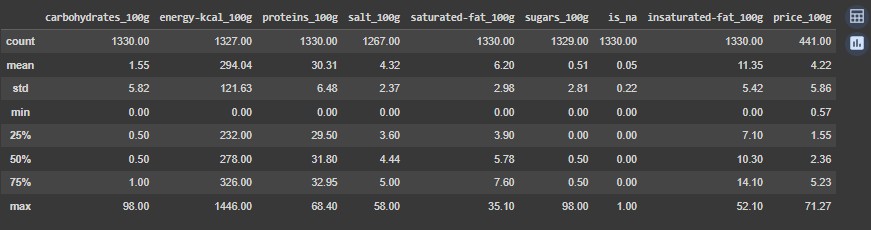

###Exclusión de productos - Regex (segundo filtro)

In [ ]:
import re

palabras_a_excluir = ["Torrezno", "Soles rellenos",'Caramelos','Taquitos','Artesano','Sabores nuestros','Bicentury','Wrap','Sticks','cocido','Pate','garron','Caprichos','Picalos','Cortezas','Pétalos','Salmorejo','Crujientes']
expresion_regular = '|'.join([re.escape(palabra) for palabra in palabras_a_excluir])

df_off = df_off[~df_off['product_name'].str.contains(expresion_regular, case=False, na=False, regex=True)]

codigo_a_actualizar = '00586432900121001907'
df_off.loc[df_off['code'] == codigo_a_actualizar, 'sugars_100g'] = 0


codigos_a_excluir = ['8435115035029']
df_off = df_off[~df_off['code'].isin(codigos_a_excluir)]

len(df_off)


1265

In [ ]:
count_non_na = df_off['price_100g'].count()

# Visualizar el resultado
print("Número de valores no nulos en 'price_100g':", count_non_na)

Número de valores no nulos en 'price_100g': 424


In [ ]:
df_off.describe()

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
count             1265.00           1265.00        1265.00    1265.00   
mean                 1.28            295.59          30.76       4.40   
std                  4.52            119.28           5.38       2.30   
min                  0.00              0.00           0.00       0.00   
25%                  0.50            233.00          29.90       3.60   
50%                  0.50            278.00          31.80       4.47   
75%                  1.00            327.00          33.00       5.00   
max                 69.00           1446.00          68.00      58.00   

       saturated-fat_100g  sugars_100g  insaturated-fat_100g  price_100g  
count             1265.00      1265.00               1265.00      424.00  
mean                 6.27         0.39                 11.49        4.29  
std                  2.93         0.67                  5.33        5.97  
min                  0.00         0.00                  0.00        0.57  
25%                  3.90         0.00                  7.10        1.55  
50%                  6.00         0.40                 10.30        2.42  
75%                  7.70         0.50                 14.10        5.35  
max                 35.10         9.60                 52.10       71.27

###Normalización

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_off_withprice = df_off.copy()
df_off_withprice = df_off.drop(columns=['code', 'countries','brands','ingredients_text'])

df_off_withprice['categoria'] = 0
df_off_withprice.loc[df_off_withprice['product_name'].str.contains(r'serrano', case=False), 'categoria'] = 1
df_off_withprice.loc[df_off_withprice['product_name'].str.contains(r'cebo', case=False), 'categoria'] = 2
df_off_withprice.loc[df_off_withprice['product_name'].str.contains(r'bellota', case=False), 'categoria'] = 3

categoria = df_off_withprice['categoria']
price_100g = df_off_withprice['price_100g']

df_off_withprice = df_off_withprice.drop(columns=['product_name'])
df_off_withprice = df_off_withprice.drop(columns=['price_100g'])


df_off_withprice = pd.DataFrame(scaler.fit_transform(df_off_withprice), columns=df_off_withprice.columns)

df_off_withprice['price_100g'] = price_100g
df_off_withprice['categoria']=categoria


df_off = df_off.drop(columns=['code', 'countries', 'product_name','brands','ingredients_text','price_100g'])
df_off = pd.DataFrame(scaler.fit_transform(df_off), columns=df_off.columns)


In [ ]:
import joblib
# export scaler for web app
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
df_off.head(3)

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0                0.01              0.17           0.45       0.08   
1                0.00              0.23           0.44       0.08   
2                0.01              0.15           0.44       0.09   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  
0                0.17         0.05                  0.16  
1                0.25         0.00                  0.27  
2                0.11         0.05                  0.12

### LOF

In [ ]:
df_off_2 = df_off.copy()

In [ ]:
df_off_2_lof = df_off_2[['carbohydrates_100g', 'energy-kcal_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g', 'insaturated-fat_100g']] # copiamos el df utilizado en el modelo pero solo las variables numericas.

In [ ]:
df_off_2_lof.describe()

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
count             1265.00           1265.00        1265.00    1265.00   
mean                 0.02              0.20           0.45       0.08   
std                  0.07              0.08           0.08       0.04   
min                  0.00              0.00           0.00       0.00   
25%                  0.01              0.16           0.44       0.06   
50%                  0.01              0.19           0.47       0.08   
75%                  0.01              0.23           0.49       0.09   
max                  1.00              1.00           1.00       1.00   

       saturated-fat_100g  sugars_100g  insaturated-fat_100g  
count             1265.00      1265.00               1265.00  
mean                 0.18         0.04                  0.22  
std                  0.08         0.07                  0.10  
min                  0.00         0.00                  0.00  
25%                  0.11         0.00                  0.14  
50%                  0.17         0.04                  0.20  
75%                  0.22         0.05                  0.27  
max                  1.00         1.00                  1.00

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

df = df_off_2_lof

lof = LocalOutlierFactor(n_neighbors=36)
lof_scores = lof.fit_predict(df)
lof_neg_scores = -lof.negative_outlier_factor_

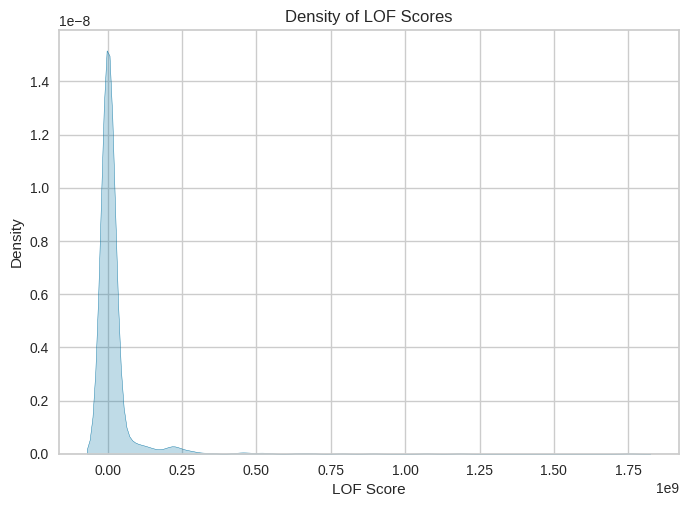

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(lof_neg_scores, fill=True)
plt.title("Density of LOF Scores")
plt.xlabel("LOF Score")
plt.ylabel("Density")
plt.show()

In [ ]:
count = lof_neg_scores.size
mean = np.mean(lof_neg_scores)
std_dev = np.std(lof_neg_scores)
minimum = np.min(lof_neg_scores)
maximum = np.max(lof_neg_scores)
percentile_25 = np.percentile(lof_neg_scores, 25)
median = np.median(lof_neg_scores)
percentile_75 = np.percentile(lof_neg_scores, 75)
percentile_90 = np.percentile(lof_neg_scores, 90)
percentile_95 = np.percentile(lof_neg_scores, 95)

describe_dict = {
    "count": count,
    "mean": mean,
    "std": std_dev,
    "min": minimum,
    "25%": percentile_25,
    "50%": median,
    "75%": percentile_75,
    "90%": percentile_90,
    "95%": percentile_95,
    "max": maximum,}

describe_dict

{'count': 1265,
 'mean': 20225325.14019678,
 'std': 97563099.0306245,
 'min': 0.9697619469608831,
 '25%': 1.0014435301081384,
 '50%': 1.17375996992911,
 '75%': 2.364977274128242,
 '90%': 32417796.041243136,
 '95%': 127973235.62311435,
 'max': 1754594943.2941554}

In [ ]:
df_off_2_lof['LOF_Neg_Scores'] = lof_neg_scores

In [ ]:
df_prueba = pd.merge(df_off_spain_price_2, df_off_2_lof[['LOF_Neg_Scores']], left_index=True, right_index=True, how='left')

In [ ]:
df_prueba.sort_values(by='LOF_Neg_Scores', ascending=False)

code                         countries  \
612   230583240047015500072853                             en:es   
1100      00586415400122001904                             en:es   
547       00597415004120001643                            España   
762       00586408100221001743                            España   
1091      00748214300122001865                             en:es   
527              8433329108379                             Spain   
650              8425852008530                            España   
62    230582780009406500006115                            España   
602              4056489257400                            España   
551              8425852024578                            España   
139   230582740008603250002809                             Spain   
879              8422598051172                             en:es   
682              8437006642729                             en:es   
681              8428982001129                             en:es   
674            101222806531234                             en:es   
1092      00748215000122001672                             en:es   
740              8438000058226                             en:es   
480       00597304409420004458                            España   
189   230582800008812500011008                             Spain   
559   230582980007515500011633                            España   
423              8420945391100                            España   
582              8437013899154                             en:es   
597              5600961111828                             en:es   
722              8437013030748                             en:es   
557       00569015400120002689                            España   
481              8423086010923                            España   
332              8412954020416                            España   
35               8422410495917                             Spain   
1083             2607526000019                             en:es   
220   230582780007206500004683                             Spain   
295       00681631001619001988                             en:es   
1152  230157000015601895002966                             en:es   
1169  230157000018801895003568                             en:es   
746              8435382819834                             en:es   
1204      00597227400122003703                             en:es   
496              8411585008459                             en:es   
438              8437019502935                            España   
620                   23000489                             en:es   
556              8437003669040                            España   
1221      00586430000122002001                             en:es   
1165             8431945807706                             en:es   
1229             8433329130820                             en:es   
1173  230582900020801850003855                             en:es   
308              8423610056366                            España   
112              8427791101013                             en:es   
697              8425545113343                             en:es   
543              8436557161154                            España   
505              8437011488039                             en:es   
1118      00584718600222004007                             en:es   
587   230583240010415500016127                             en:es   
765              8421395357500                             Spain   
532              8437009203019                            España   
1029             8431945807508                             en:es   
745              8431945779775                             en:es   
581              8435115035623                             en:es   
1211                    279283                             en:es   
467              8403580000026                             en:es   
463              8425545113497                            España   
940       0059

In [ ]:
threshold = df_prueba['LOF_Neg_Scores'].quantile(0.95)

df_prueba_2 = df_prueba[df_prueba['LOF_Neg_Scores'] <= threshold]

total_casos_originales = df_off.shape[0] #df_prueba.shape[0]
total_casos_filtrados = df_prueba_2.shape[0]

porcentaje_filtrado = (total_casos_filtrados / total_casos_originales) * 100

print(f"Total de casos en df_prueba: {total_casos_originales}")
print(f"Total de casos en df_prueba_2: {total_casos_filtrados}")
print(f"Porcentaje de casos filtrados: {100-porcentaje_filtrado:.2f}%")

Total de casos en df_prueba: 1265
Total de casos en df_prueba_2: 1201
Porcentaje de casos filtrados: 5.06%


In [ ]:
df_off.shape[0]

1265

In [ ]:
percentil_95 = df_prueba['LOF_Neg_Scores'].quantile(0.95)

es_outlier = df_prueba['LOF_Neg_Scores'] > percentil_95
df_prueba['Outlier'] = es_outlier

tabla_medianas = df_prueba.groupby('Outlier').median()
tabla_medianas

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
Outlier                                                                   
False                  0.50            278.00          31.80       4.41   
True                   0.50            280.50          31.40       4.45   

         saturated-fat_100g  sugars_100g  insaturated-fat_100g  price_100g  \
Outlier                                                                      
False                  5.70         0.50                 10.20        2.35   
True                   7.00         0.15                 11.05        3.32   

         LOF_Neg_Scores  
Outlier                  
False              1.13  
True       225567208.37

In [ ]:
from sklearn.cluster import KMeans

df_filtered = df_prueba_2[['carbohydrates_100g', 'energy-kcal_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g', 'insaturated-fat_100g']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)

<ipython-input-186-fe5cfb381032>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)


In [ ]:
df_filtered['Cluster'].value_counts()

2    505
0    492
4    180
3     18
1      6
Name: Cluster, dtype: int64

In [ ]:
cluster_means_sin_outliers = df_filtered.groupby('Cluster').mean()
cluster_means_sin_outliers['recodified'] = cluster_means_sin_outliers['energy-kcal_100g']
cluster_means_sorted_sin_outliers = cluster_means_sin_outliers.sort_values(by='recodified', ascending=False)
cluster_means_sorted_sin_outliers['cluster_reorder'] = range(0, len(cluster_means_sorted_sin_outliers))

In [ ]:
cluster_size = df_filtered.groupby('Cluster').size()

cluster_size_df = cluster_size.reset_index(name='number_of_rows')

cluster_means_sorted_sin_outliers = cluster_means_sorted_sin_outliers.merge(cluster_size_df, on='Cluster')

In [ ]:
cluster_means_sorted_sin_outliers

Cluster  carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0        1                0.60           1315.00          31.68       3.83   
1        3                1.01            827.10          27.33       4.04   
2        4                2.20            398.93          31.43       3.65   
3        0                1.49            302.23          30.21       4.42   
4        2                1.53            218.54          30.09       4.41   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  recodified  \
0                7.00         0.37                 13.82     1315.00   
1                4.83         0.48                  9.19      827.10   
2                9.57         1.01                 19.73      398.93   
3                7.13         0.40                 12.47      302.23   
4                4.06         0.48                  7.38      218.54   

   cluster_reorder  number_of_rows  
0                0               6  
1                1              18  
2                2             180  
3                3             492  
4                4             505

##Modelado

###Número de cluster

Para este apartado, se buscará cual es el mejor número de cluster con 3 técnicas de revisión, el método de elbow, dendrograma y clustegrama, siendo el último el más importante para la toma de decisión, debido a la visualización de las ramificaciones en cada etapa.

In [ ]:
df_filtered = df_filtered[['carbohydrates_100g', 'energy-kcal_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g', 'insaturated-fat_100g']]

####Metodo Elbow (numero de cluster K)

In [ ]:
#pip install yellowbrick


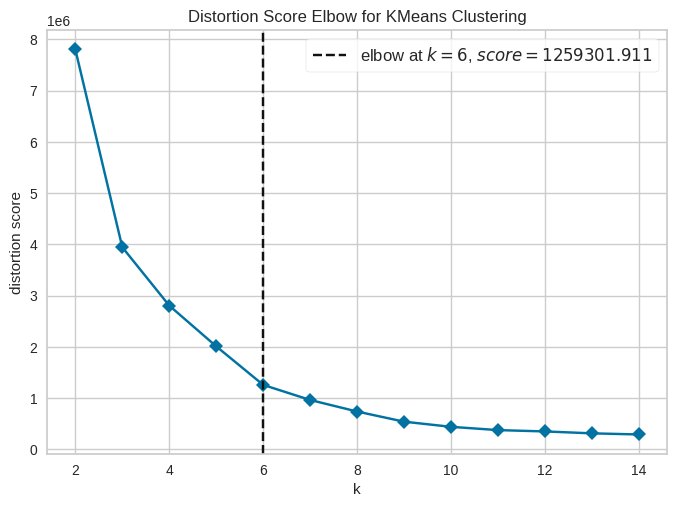

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#data_new = df_off[['carbohydrates_100g', 'energy-kcal_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g', 'insaturated-fat_100g']]

model = KMeans(n_init=10, random_state=123)
visualizer = KElbowVisualizer(model, k=(2, 15), metric='distortion', timings=False)

visualizer.fit(df_filtered)
visualizer.show()




####Dendrograma

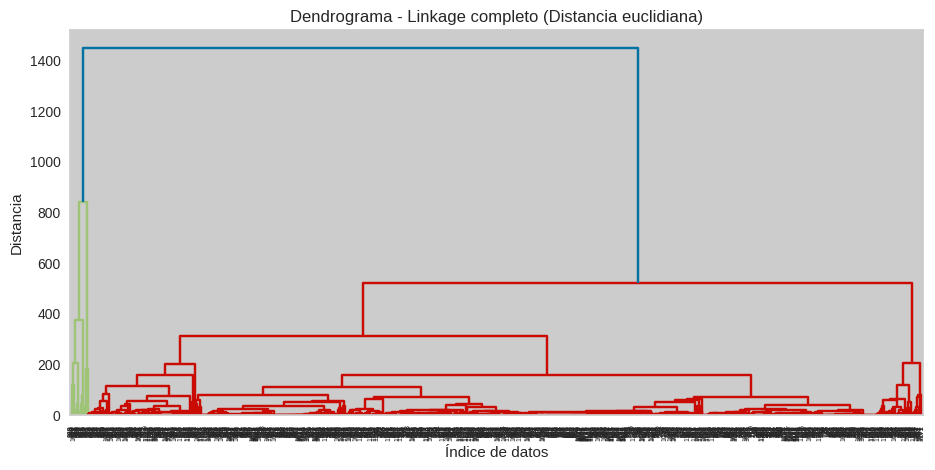

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

linked = linkage(df_filtered, method='complete', metric='euclidean')


plt.figure(figsize=(11,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma - Linkage completo (Distancia euclidiana)')
plt.xlabel('Índice de datos')
plt.ylabel('Distancia')
plt.show()

####Clustergrama

La idea es visualizar el comportamiento en k cluster y llegar a asignar alguna caracteristica como por ej. Es jamon de cebo iberico.

https://github.com/martinfleis/clustergram

In [ ]:
df_filtered = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns)


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.021 seconds.
K=3 fitted in 0.025 seconds.
K=4 fitted in 0.025 seconds.
K=5 fitted in 0.031 seconds.
K=6 fitted in 0.033 seconds.
K=7 fitted in 0.041 seconds.
K=8 fitted in 0.045 seconds.
K=9 fitted in 0.043 seconds.
K=10 fitted in 0.043 seconds.
K=11 fitted in 0.045 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

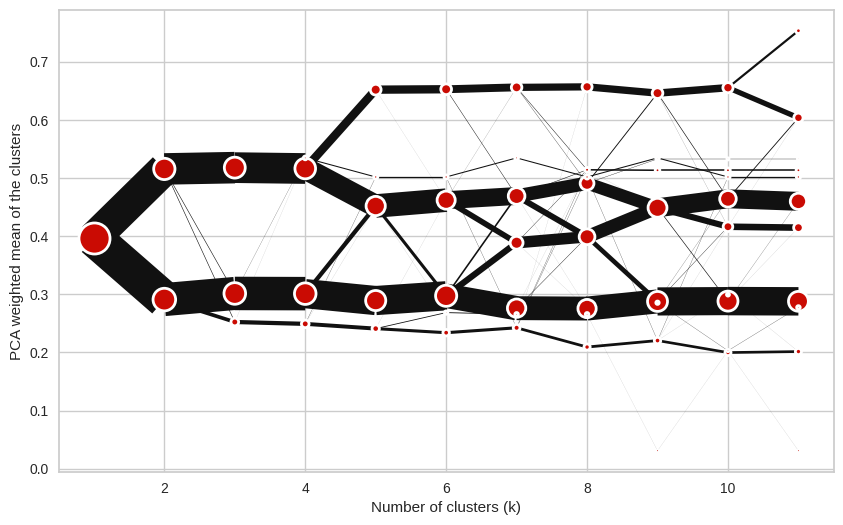

In [ ]:
!pip install clustergram
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_off_cgram = df_filtered.copy()

cgram = Clustergram(range(1, 12), method='kmeans')
cgram.fit(df_off_cgram)
cgram.plot(figsize=(10, 6))

In [ ]:
#observaciones_por_pasos = [data.shape[0] for data in cgram.cluster_data_]

#print(observaciones_por_pasos)

### Clustering y recodified

In [ ]:
df_off_2 = df_filtered.copy()
#df_off_2.drop(columns={"price_100g"},inplace=True) ##aqui
kmeans = KMeans(n_clusters=4,n_init=10, random_state=123)
df_off_2['cluster'] = kmeans.fit_predict(df_filtered)

cluster_means = df_off_2.groupby('cluster').mean()
cluster_means['recodified'] = cluster_means['energy-kcal_100g']  #Recodificación por criterio energy-kcal.
cluster_means_sorted = cluster_means.sort_values(by='recodified', ascending=False)
cluster_means_sorted['cluster_reorder'] = range(0, len(cluster_means_sorted))
cluster_means_sorted

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
cluster                                                                   
2                      0.01              0.71           0.44       0.07   
1                      0.01              0.23           0.45       0.07   
0                      0.01              0.17           0.47       0.08   
3                      0.12              0.15           0.17       0.05   

         saturated-fat_100g  sugars_100g  insaturated-fat_100g  recodified  \
cluster                                                                      
2                      0.17         0.00                  0.17        0.71   
1                      0.30         0.00                  0.30        0.23   
0                      0.16         0.00                  0.15        0.17   
3                      0.13         0.03                  0.15        0.15   

         cluster_reorder  
cluster                   
2                      0  
1                      1  
0                      2  
3                      3

In [ ]:
# export model for web app
joblib.dump(kmeans, 'model.pkl')

['model.pkl']

Siguiente codigo es importante para las cantidades por cluster

In [ ]:
cluster_counts = df_off_2['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'nrow']

cluster_summary = pd.merge(cluster_counts, cluster_means_sorted, on='cluster')
cluster_summary = cluster_summary[[col for col in cluster_summary.columns if col != 'nrow'] + ['nrow']]
cluster_summary = cluster_summary.sort_values(by='cluster_reorder')
cluster_summary

cluster  carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
3        2                0.01              0.71           0.44       0.07   
1        1                0.01              0.23           0.45       0.07   
0        0                0.01              0.17           0.47       0.08   
2        3                0.12              0.15           0.17       0.05   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  recodified  \
3                0.17         0.00                  0.17        0.71   
1                0.30         0.00                  0.30        0.23   
0                0.16         0.00                  0.15        0.17   
2                0.13         0.03                  0.15        0.15   

   cluster_reorder  nrow  
3                0    19  
1                1   531  
0                2   579  
2                3    72

In [ ]:
df_off_2.head(3)

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0                0.01              0.17           0.44       0.08   
1                0.00              0.23           0.44       0.08   
2                0.01              0.15           0.44       0.09   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  cluster  
0                0.21         0.01                  0.16        0  
1                0.31         0.00                  0.27        1  
2                0.14         0.01                  0.12        0

observaciones mas representativas por centroide y cluster

In [ ]:
from scipy.spatial import distance

centroides = kmeans.cluster_centers_
df_distancias = pd.DataFrame()
features = df_off_2.drop(columns='cluster')


for i, centroide in enumerate(centroides):
    distancias = features.apply(lambda x: distance.euclidean(x, centroide), axis=1)
    df_distancias['dist_cluster_' + str(i)] = distancias

for i, centroide in enumerate(centroides):
    distancias = features.apply(lambda x: distance.euclidean(x, centroide), axis=1)
    df_distancias['dist_cluster_' + str(i)] = distancias


df_distancias['closest_cluster'] = df_distancias.idxmin(axis=1)

representative_obs = pd.DataFrame()

for i, centroide in enumerate(centroides):
    closest_observations = df_distancias.loc[df_distancias['closest_cluster'] == 'dist_cluster_' + str(i)].nsmallest(3, 'dist_cluster_' + str(i))
    representative_obs = representative_obs.append(df_off_2.iloc[closest_observations.index.tolist()])

representative_obs_sorted = representative_obs.sort_values(by='cluster')
representative_obs_sorted

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
19                  0.00              0.17           0.48       0.09   
452                 0.00              0.17           0.48       0.09   
808                 0.00              0.17           0.48       0.09   
84                  0.01              0.23           0.44       0.07   
1133                0.01              0.23           0.44       0.07   
1132                0.01              0.23           0.44       0.07   
515                 0.01              0.66           0.47       0.09   
247                 0.01              0.66           0.47       0.09   
511                 0.01              0.66           0.47       0.09   
771                 0.10              0.11           0.23       0.03   
1048                0.20              0.15           0.14       0.03   
190                 0.05              0.11           0.19       0.02   

      saturated-fat_100g  sugars_100g  insaturated-fat_100g  cluster  
19                  0.16         0.00                  0.15        0  
452                 0.16         0.00                  0.15        0  
808                 0.16         0.00                  0.15        0  
84                  0.30         0.01                  0.29        1  
1133                0.30         0.01                  0.29        1  
1132                0.30         0.01                  0.29        1  
515                 0.14         0.00                  0.14        2  
247                 0.14         0.00                  0.14        2  
511                 0.14         0.00                  0.14        2  
771                 0.12         0.01                  0.12        3  
1048                0.10         0.03                  0.14        3  
190                 0.10         0.01                  0.12        3

###Radar plot

In [ ]:
# from math import pi

# to_trans = df_off_2.groupby('cluster').mean()
# inverse_transform = scaler.inverse_transform(to_trans)
# df_clusters_mean = pd.DataFrame(inverse_transform, columns=to_trans.columns, index=to_trans.index)[["carbohydrates_100g", "proteins_100g", "salt_100g", "saturated-fat_100g",
#                          "sugars_100g", "insaturated-fat_100g"]]

# angles = [n / float(df_clusters_mean.shape[1]) * 2 * pi for n in range(df_clusters_mean.shape[1])]
# angles += angles[:1]

# colors = plt.cm.viridis(np.linspace(0, 1, df_clusters_mean.shape[0]))

# for cluster_idx, color in zip(df_clusters_mean.index, colors):
#     cluster_values = df_clusters_mean.loc[cluster_idx].values.tolist()

#     cluster_values += cluster_values[:1]

#     fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

#     ax.set_theta_offset(pi / 2)
#     ax.set_theta_direction(-1)

#     plt.xticks(angles[:-1], df_clusters_mean.columns, color='grey', size=8)
#     plt.yticks(np.arange(0.2, 1.2, 0.2), ['20', '40', '60', '80', '100'], color='grey', size=7)
#     # plt.ylim(0,1)


#     ax.plot(angles, cluster_values, color=color)
#     ax.fill(angles, cluster_values, color=color, alpha=0.1)

#     plt.title('Cluster ' + str(cluster_idx), size=15, color=color, y=1.1)

# plt.show()

In [ ]:
###Radar plot

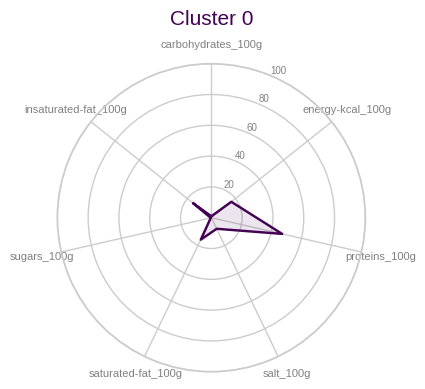

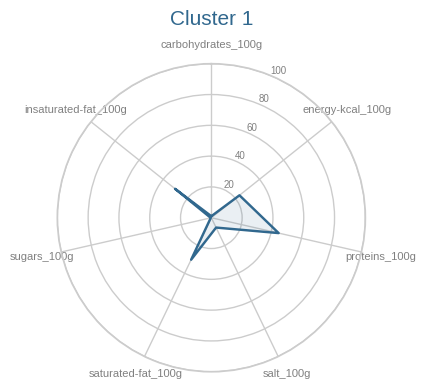

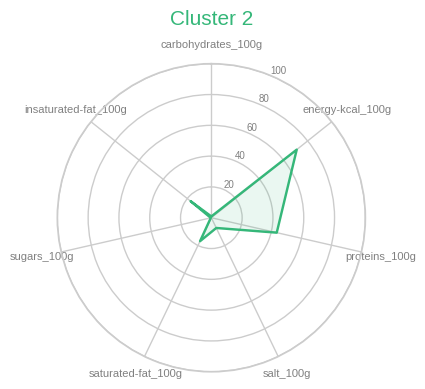

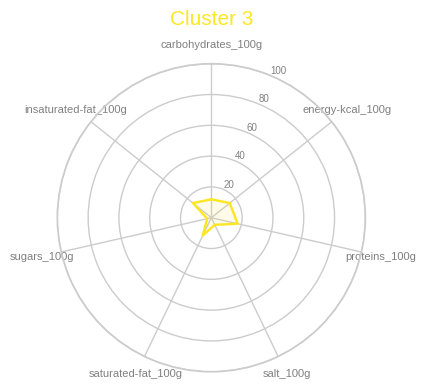

In [ ]:
from math import pi

df_clusters_mean = df_off_2.groupby('cluster').mean()

angles = [n / float(df_clusters_mean.shape[1]) * 2 * pi for n in range(df_clusters_mean.shape[1])]
angles += angles[:1]

colors = plt.cm.viridis(np.linspace(0, 1, df_clusters_mean.shape[0]))

for cluster_idx, color in zip(df_clusters_mean.index, colors):
    cluster_values = df_clusters_mean.loc[cluster_idx].values.tolist()

    cluster_values += cluster_values[:1]

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], df_clusters_mean.columns, color='grey', size=8)
    plt.yticks(np.arange(0.2, 1.2, 0.2), ['20', '40', '60', '80', '100'], color='grey', size=7)
    plt.ylim(0,1)


    ax.plot(angles, cluster_values, color=color)
    ax.fill(angles, cluster_values, color=color, alpha=0.1)

    plt.title('Cluster ' + str(cluster_idx), size=15, color=color, y=1.1)

plt.show()



In [ ]:
column_names = df_off_2.columns.tolist()
column_names

['carbohydrates_100g',
 'energy-kcal_100g',
 'proteins_100g',
 'salt_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'insaturated-fat_100g',
 'cluster']

https://github.com/martinfleis/clustergram

In [ ]:
df_off_3 = df_off_2.copy()

cluster                         0      1     2     3
carbohydrates_100g   count 579.00 531.00 19.00 72.00
                     mean    0.01   0.01  0.01  0.12
                     std     0.02   0.02  0.01  0.21
                     min     0.00   0.00  0.00  0.00
                     25%     0.01   0.00  0.01  0.01
                     50%     0.01   0.01  0.01  0.01
                     75%     0.01   0.01  0.01  0.11
                     max     0.33   0.26  0.05  1.00
energy-kcal_100g     count 579.00 531.00 19.00 72.00
                     mean    0.17   0.23  0.71  0.15
                     std     0.03   0.04  0.15  0.09
                     min     0.00   0.00  0.46  0.00
                     25%     0.16   0.21  0.61  0.11
                     50%     0.16   0.23  0.66  0.11
                     75%     0.18   0.26  0.88  0.19
                     max     0.29   0.46  1.00  0.46
proteins_100g        count 579.00 531.00 19.00 72.00
                     mean    0.47   0.45  0.44

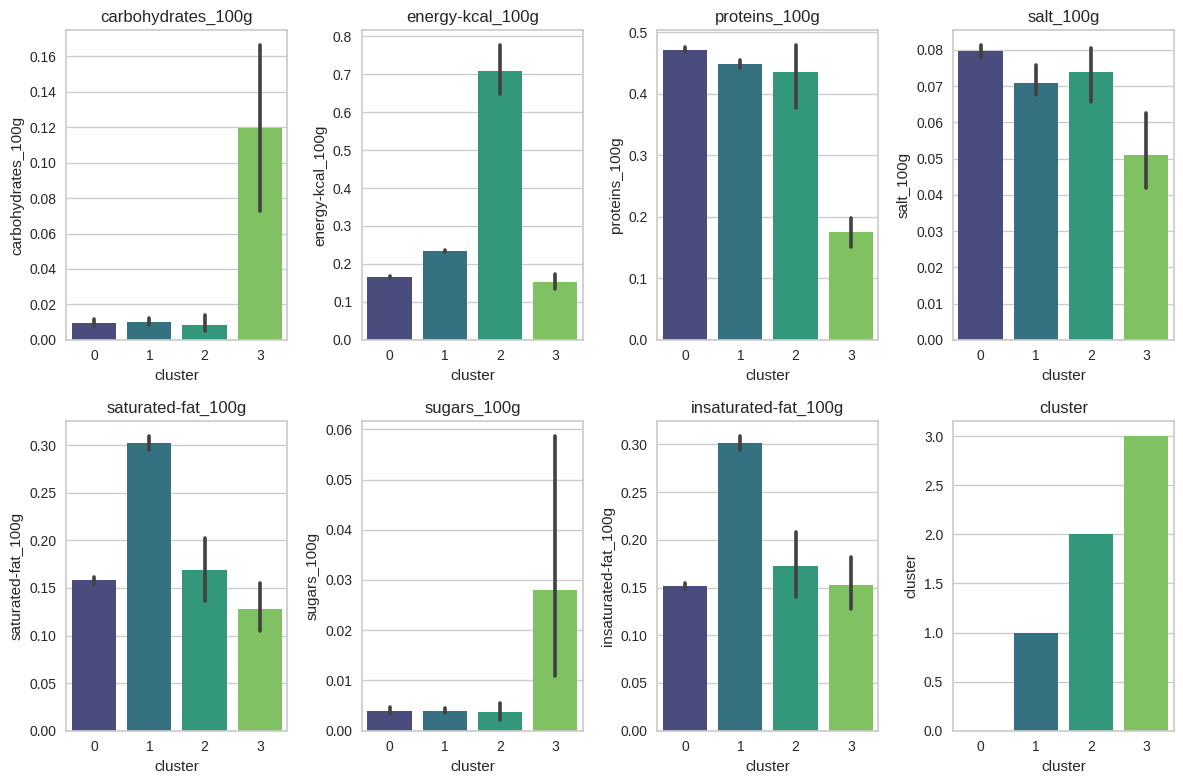

In [ ]:
cluster_stats = df_off_2.groupby('cluster').describe().transpose()
print(cluster_stats)

# Visualiza perfiles de cluster con gráficos de barras
plt.figure(figsize=(12, 8))
for column in df_off_3.columns:
    plt.subplot(2, 4, df_off_2.columns.get_loc(column) + 1)
    sns.barplot(x='cluster', y=column, data=df_off_2, palette='viridis')
    plt.title(column)

plt.tight_layout()
plt.show()

###Mapa Autoorganizado

In [ ]:
df_off_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   carbohydrates_100g    1201 non-null   float64
 1   energy-kcal_100g      1201 non-null   float64
 2   proteins_100g         1201 non-null   float64
 3   salt_100g             1201 non-null   float64
 4   saturated-fat_100g    1201 non-null   float64
 5   sugars_100g           1201 non-null   float64
 6   insaturated-fat_100g  1201 non-null   float64
 7   cluster               1201 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 70.5 KB


In [ ]:
pip install minisom

   carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0                0.01              0.17           0.44       0.08   
1                0.00              0.23           0.44       0.08   
2                0.01              0.15           0.44       0.09   
3                0.01              0.23           0.44       0.09   
4                0.00              0.22           0.48       0.07   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  
0                0.21         0.01                  0.16  
1                0.31         0.00                  0.27  
2                0.14         0.01                  0.12  
3                0.32         0.01                  0.29  
4                0.27         0.00                  0.26  


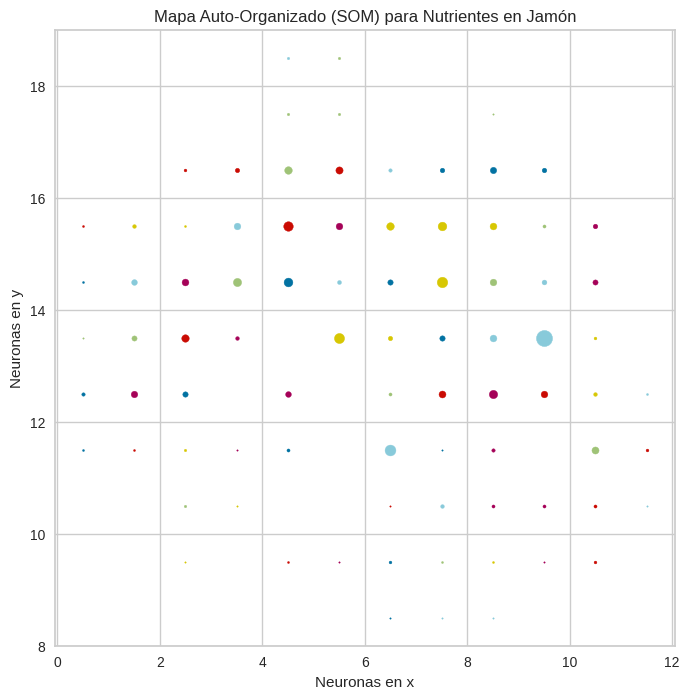

In [ ]:
from minisom import MiniSom
import matplotlib.pyplot as plt

df = df_off_2.drop('cluster', axis=1)
print(df.head())
data = df.values
labels = df_off_2['cluster'].values


x=20
y=20
som_shape = (x,y)

som = MiniSom(x,y, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)

# entrenamiento del SOM
som.pca_weights_init(data)
som.train_random(data, num_iteration=1000)

# visualización
plt.figure(figsize=(8, 8))
for (x, y), freq in som.win_map(data).items():
    plt.scatter(x + .5, y + .5, len(freq))

# Agregando títulos y etiquetas
plt.title('Mapa Auto-Organizado (SOM) para Nutrientes en Jamón')
plt.xlabel('Neuronas en x')
plt.ylabel('Neuronas en y')

plt.show()


   carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0                0.01              0.17           0.44       0.08   
1                0.00              0.23           0.44       0.08   
2                0.01              0.15           0.44       0.09   
3                0.01              0.23           0.44       0.09   
4                0.00              0.22           0.48       0.07   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  
0                0.21         0.01                  0.16  
1                0.31         0.00                  0.27  
2                0.14         0.01                  0.12  
3                0.32         0.01                  0.29  
4                0.27         0.00                  0.26  


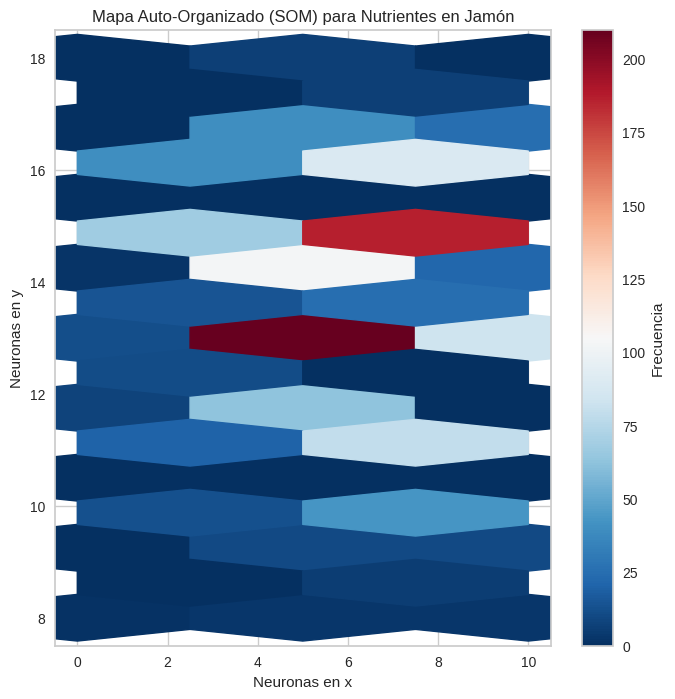

In [ ]:
from minisom import MiniSom
import matplotlib.pyplot as plt

df = df_off_2.drop('cluster', axis=1)
print(df.head())
data = df.values
#labels = df_off_2['cluster'].values


x=20
y=20
#som_shape = (x,y)

som = MiniSom(x,y, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)

# entrenamiento del SOM
som.pca_weights_init(data)
som.train_random(data, num_iteration=1000)


data_hex = []
for (x, y), freq in som.win_map(data).items():
    for count in range(len(freq)):
        data_hex.append((x, y))

df_hex = pd.DataFrame(data_hex, columns=["X", "Y"])


plt.figure(figsize=(8, 8))
plt.hexbin(df_hex["X"], df_hex["Y"], gridsize=(x, y), cmap='RdBu_r')


plt.title('Mapa Auto-Organizado (SOM) para Nutrientes en Jamón')
plt.xlabel('Neuronas en x')
plt.ylabel('Neuronas en y')

cb = plt.colorbar()
cb.set_label('Frecuencia')

plt.show()


Los hexágonos más claros representan áreas con menos observaciones (frecuencia más baja) y los hexágonos más oscuros representan áreas con más observaciones (frecuencia más alta). Por lo que los datos más claros, indican áreas que son menos comunes (outliers).

In [ ]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
df_off_2.head()

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0                0.01              0.17           0.44       0.08   
1                0.00              0.23           0.44       0.08   
2                0.01              0.15           0.44       0.09   
3                0.01              0.23           0.44       0.09   
4                0.00              0.22           0.48       0.07   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  cluster  
0                0.21         0.01                  0.16        0  
1                0.31         0.00                  0.27        1  
2                0.14         0.01                  0.12        0  
3                0.32         0.01                  0.29        1  
4                0.27         0.00                  0.26        1

###Categorias de jamones

In [ ]:
summary_per_cluster = df_off_2.copy()
summary_per_cluster["price_100g"] = df_off_withprice["price_100g"]
summary_per_cluster["categoria"] = df_off_withprice["categoria"]


In [ ]:
summary_per_cluster.head(1)

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
0                0.01              0.17           0.44       0.08   

   saturated-fat_100g  sugars_100g  insaturated-fat_100g  cluster  price_100g  \
0                0.21         0.01                  0.16        0         NaN   

   categoria  
0       1.00

In [ ]:
categoria_pct = summary_per_cluster["categoria"].value_counts(normalize=True)

categoria_pct

1.00   0.57
2.00   0.25
3.00   0.11
0.00   0.07
Name: categoria, dtype: float64

Categorias de jamones

* Jamón Serrano: La categoría '1' representa el 55% del total.
* Jamón de Cebo: La categoría '2' representa el 24% del total.
* Jamón de Bellota: La categoría '3' representa el 11% del total.
* Nan: La categoría '0' representa el 10% del total.

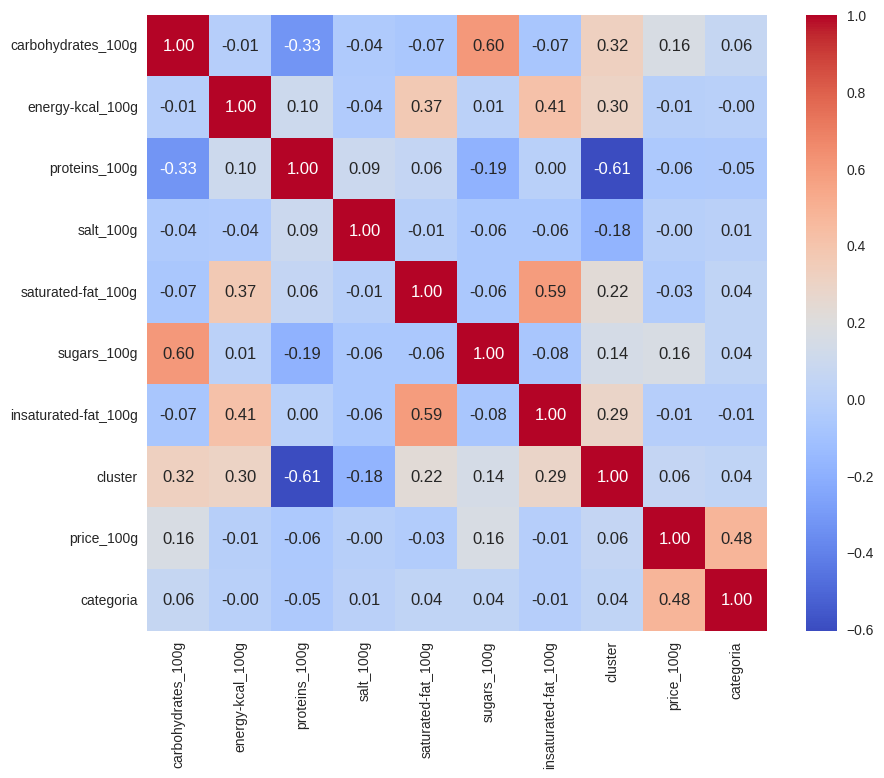

In [ ]:
import seaborn as sns

correlacion = summary_per_cluster.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
categoria_dummies = pd.get_dummies(summary_per_cluster['categoria'], prefix='categoria')
summary_per_cluster_enc = pd.concat([summary_per_cluster, categoria_dummies], axis=1)


categories = ['categoria_0.0', 'categoria_1.0', 'categoria_2.0', 'categoria_3.0']

summary_per_cluster_pct = summary_per_cluster_enc.groupby('cluster')[categories].mean().reset_index()
summary_per_cluster_pct

cluster  categoria_0.0  categoria_1.0  categoria_2.0  categoria_3.0
0        0           0.07           0.55           0.24           0.10
1        1           0.06           0.54           0.23           0.11
2        2           0.05           0.58           0.26           0.11
3        3           0.08           0.40           0.24           0.17

In [ ]:
#summary_per_cluster = summary_per_cluster.drop(columns=['num_rows'])

In [ ]:
num_rows = summary_per_cluster.groupby('cluster').size()
num_rows_df = num_rows.to_frame(name = 'num_rows')

summary_per_cluster = summary_per_cluster.groupby("cluster").median()
summary_per_cluster = summary_per_cluster.join(num_rows_df)

summary_per_cluster = summary_per_cluster.join(summary_per_cluster_pct)
summary_per_cluster

carbohydrates_100g  energy-kcal_100g  proteins_100g  salt_100g  \
cluster                                                                   
0                      0.01              0.16           0.47       0.09   
1                      0.01              0.23           0.45       0.07   
2                      0.01              0.66           0.45       0.08   
3                      0.01              0.11           0.23       0.03   

         saturated-fat_100g  sugars_100g  insaturated-fat_100g  price_100g  \
cluster                                                                      
0                      0.14         0.00                  0.14        1.99   
1                      0.28         0.01                  0.27        2.23   
2                      0.14         0.01                  0.14        2.87   
3                      0.12         0.01                  0.12        4.13   

         categoria  num_rows  cluster  categoria_0.0  categoria_1.0  \
cluster                                                               
0             1.00       579        0           0.07           0.55   
1             1.00       531        1           0.06           0.54   
2             1.00        19        2           0.05           0.58   
3             1.00        72        3           0.08           0.40   

         categoria_2.0  categoria_3.0  
cluster                                
0                 0.24           0.10  
1                 0.23           0.11  
2                 0.26           0.11  
3                 0.24           0.17

In [ ]:
# export clusters summary for web app
summary_per_cluster.to_pickle("clusters.pkl")


*   **Cluster 0:** Jamones con la mayor cantidad de grasas saturadas e insaturadas, con una mediana de 0.28 y 0.38 gramos por cada 100 gramos de jamón respectivamente. Junto con el último cluster representan los jamones más caros.
*   **Cluster 1:** Destaca el alto componente en sal, indicando jamones de peor calidad. Junto con el cluster 4 contienen los jamones con precio más bajo.
*   **Cluster 2:** Alto componente grasas saturadas (0.18/100g). Tienen un coste elevado.
*   **Cluster 3:** Jamones que contienen menor componente de kilocalorías y sal. Coste bajo.
*   **Cluster 4:** Jamones muy dulces y por ende con muchos carbohydratos, indicando una baja calidad de los mismos. También con bajas grasas insaturadas. Los jamones más baratos junto a los del cluster 1.
*   **Cluster 5:** Mucho aporte calórico y ricos en sal. Jamones de bajo precio.
*   **Cluster 6:** Jamones bastante equilibrados, destacan por contener altas grasas insaturadas. Los más elevados de precio junto a los del cluster 0.



Radar plot por categorias en cada cluster




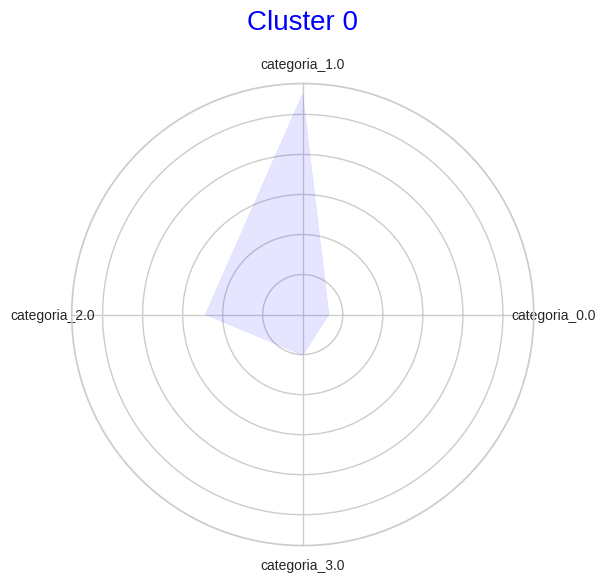

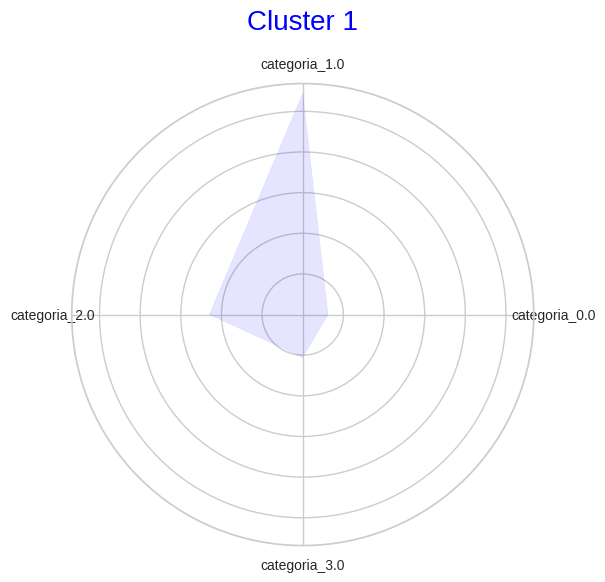

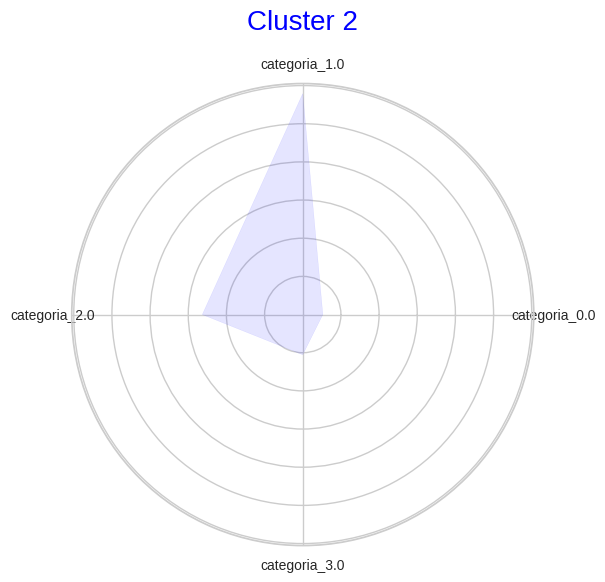

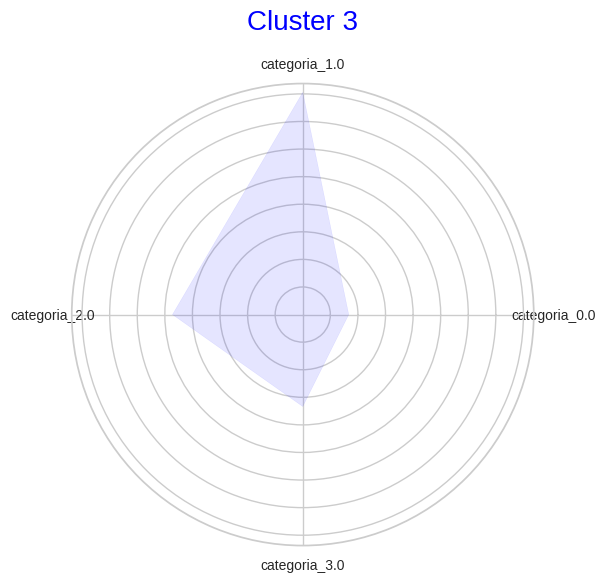

In [ ]:
categories = ['categoria_0.0', 'categoria_1.0', 'categoria_2.0', 'categoria_3.0']
num_vars = len(categories)


angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]


for i, row in summary_per_cluster[categories].iterrows():
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    values = row.tolist()
    values += values[:1]
    ax.fill(angles, values, color='blue', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title('Cluster ' + str(i), size=20, color='blue', y=1.1)
    plt.show()


https://www.kaggle.com/code/garginirmal/selforganizingmaps-with-minisom